<a href="https://colab.research.google.com/github/wpfkf4644/boostcourse-ds-510/blob/master/%EC%B9%9C%EC%B9%A0%EB%9D%BC%EC%BD%94%EC%B9%98_07%ED%8C%80_3%EC%A3%BC%EC%B0%A8_%EB%AF%B8%EC%85%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setting

In [ ]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
!pip install koreanize-matplotlib
import koreanize_matplotlib
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
from IPython.display import set_matplotlib_formats

# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

# 폰트가 선명하게 보이기 위해 - 그래프에 retina display 적용
# retina 대신 svg 등의 설정을 할 수도 있으며
# 디스플레이(모니터)가 retina 를 지원해야만 선명한 차이를 볼 수 있습니다.
%config InlineBackend.figure_format = 'retina'

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

# 기본 설정 읽기
import matplotlib.pyplot as plt

# size, family
print('# 설정 되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] )
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

# 에러 발생 방지
# pd.set_option('mode.chained_assignment',  None)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

# 데이터 불러오기
# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

In [ ]:
# 데이터프레임의 상위 5행 확인하기
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [ ]:
# 데이터프레임의 정보(열 이름, 데이터 타입 등) 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

#📌 Q1
연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. <br> 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!

In [ ]:
# 연령대 코드 딕셔너리
age_code = {
    1: '0~4세', 2: '5~9세', 3: '10~14세', 4: '15~19세',
    5: '20~24세', 6: '25~29세', 7: '30~34세', 8: '35~39세',
    9: '40~44세', 10: '45~49세', 11: '50~54세', 12: '55~59세',
    13: '60~64세', 14: '65~69세', 15: '70~74세', 16: '75~79세',
    17: '80~84세', 18: '85세+'
}

# "연령대" 컬럼 생성
df["연령대"] = df["연령대코드(5세단위)"].replace(age_code)

# 기술통계값 구하기
df_describe = df.pivot_table(index="연령대", values="허리둘레", aggfunc="describe")

# 출력할 컬럼을 순서대로 리스트에 저장
cols = ["count","mean","std","min","25%","50%","75%","max"]

# 결과 출력
df_describe[cols]

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


## (+) 연령대별 허리둘레 분포 확인하기

### (1) 이상치 확인
- 기술통계량을 확인한 결과, max값이 **999**인 경우가 있었다.
- 현실적으로 허리둘레가 999cm일 수 없고, 다른 값들과 크게 차이가 나기 때문에 **결측치**라고 판단하였다.
- 따라서 해당 값을 가진 데이터를 무시하고 분포를 확인한다.

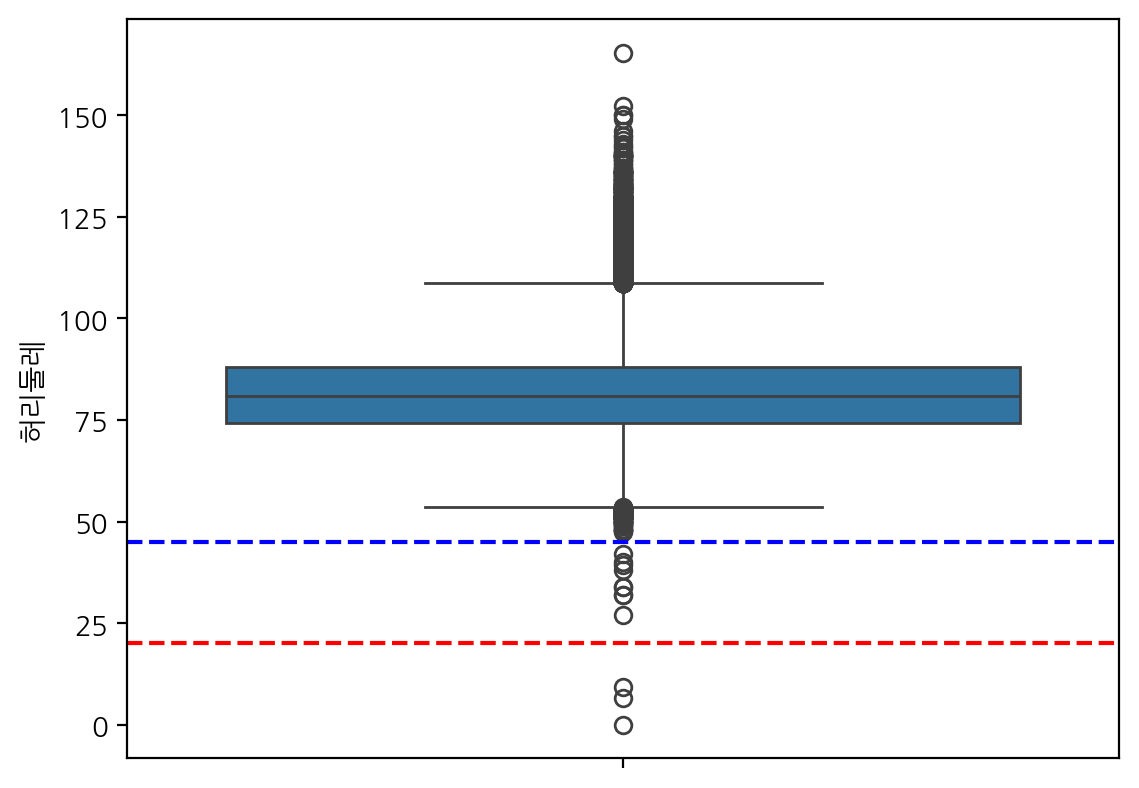

In [ ]:
# 결측치를 제외한, 전체 데이터의 분포를 확인
sns.boxplot(data=df[df["허리둘레"] < 999], y="허리둘레")

# 기준선 표시
plt.axhline(y=20, color="r", linestyle="--") # y = 20
plt.axhline(y=45, color="b", linestyle="--") # y = 45

- 이상치 중, 현실적으로 존재할 수 없을 것 같은 값의 데이터에 대해 세부적으로 탐색해본다.

In [ ]:
# 이상치 데이터 확인

# 허리둘레 데이터를 작은 순서대로 10개만 확인
print(sorted(df["허리둘레"].unique())[:10])

[0.0, 6.5, 9.2, 27.0, 32.0, 34.0, 38.0, 39.4, 40.0, 42.1]


In [ ]:
# 이상치 리스트 생성
waist_outlier = sorted(df["허리둘레"].unique())[:13]

# 이상치 데이터 저장
df_outlier = df[df["허리둘레"].isin(waist_outlier)].copy()

# 이상치 판별을 위해 bmi 컬럼 생성
df_outlier["bmi"] = df_outlier["체중(5Kg 단위)"] / ((df_outlier["신장(5Cm단위)"] / 100) ** 2)  # bmi = 체중 / (키)^2
df_outlier["bmi"] = df_outlier["bmi"].round(1) # 편의성을 위해 한 자리까지만 표기

# 비만도 측정 함수 생성
def is_obesity(bmi):
    if np.isnan(bmi) : return "측정불가"
    elif bmi < 18.5 : return "저체중"
    elif bmi < 23 : return "정상"
    elif bmi < 25 : return "과체중"
    else: return "비만"

# 비만도 컬럼 생성
df_outlier["비만도"] = df_outlier["bmi"].apply(lambda x : is_obesity(x))

# 이상치 데이터 출력
df_outlier[["성별코드","연령대","신장(5Cm단위)","체중(5Kg 단위)","허리둘레","비만도","bmi"]].sort_values("허리둘레")

,성별코드,연령대,신장(5Cm단위),체중(5Kg 단위),허리둘레,비만도,bmi
931073,2,60~64세,NaN,NaN,0.0,측정불가,NaN
471952,2,50~54세,155.0,45.0,6.5,정상,18.7
411306,1,35~39세,170.0,75.0,9.2,비만,26.0
468683,1,60~64세,165.0,60.0,27.0,정상,22.0
838640,2,60~64세,145.0,55.0,32.0,비만,26.2
851797,1,55~59세,170.0,60.0,32.0,정상,20.8
668250,2,85세+,140.0,40.0,34.0,정상,20.4
623703,1,55~59세,165.0,60.0,34.0,정상,22.0
20078,1,80~84세,160.0,60.0,38.0,과체중,23.4
36387,2,80~84세,150.0,40.0,39.4,저체중,17.8


**허리둘레 10cm 미만**
- 측정오류 등의 이유로 인한 이상치라고 판단하였다.
---
**허리둘레 27cm 이상**
- 많이 마른 경우일 수 있다고 생각해, 확인을 위해 bmi 지수 및 비만도 컬럼을 생성하였다.
- 정상 및 비만인 경우가 많아, 측정오류(인치/cm 단위환산을 잘못한 경우 등)로 인한 이상치라고 판단하였다.
---
**허리둘레 40cm 초과**
- 키/체중/비만도를 고려했을 때, 정상적인 데이터라고 판단하였다.
---
**결론**
- 허리둘레 40 이하를 이상치로 정의하고, 이상치를 제거한 데이터의 분포를 확인한다.

<Axes: xlabel='연령대', ylabel='허리둘레'>

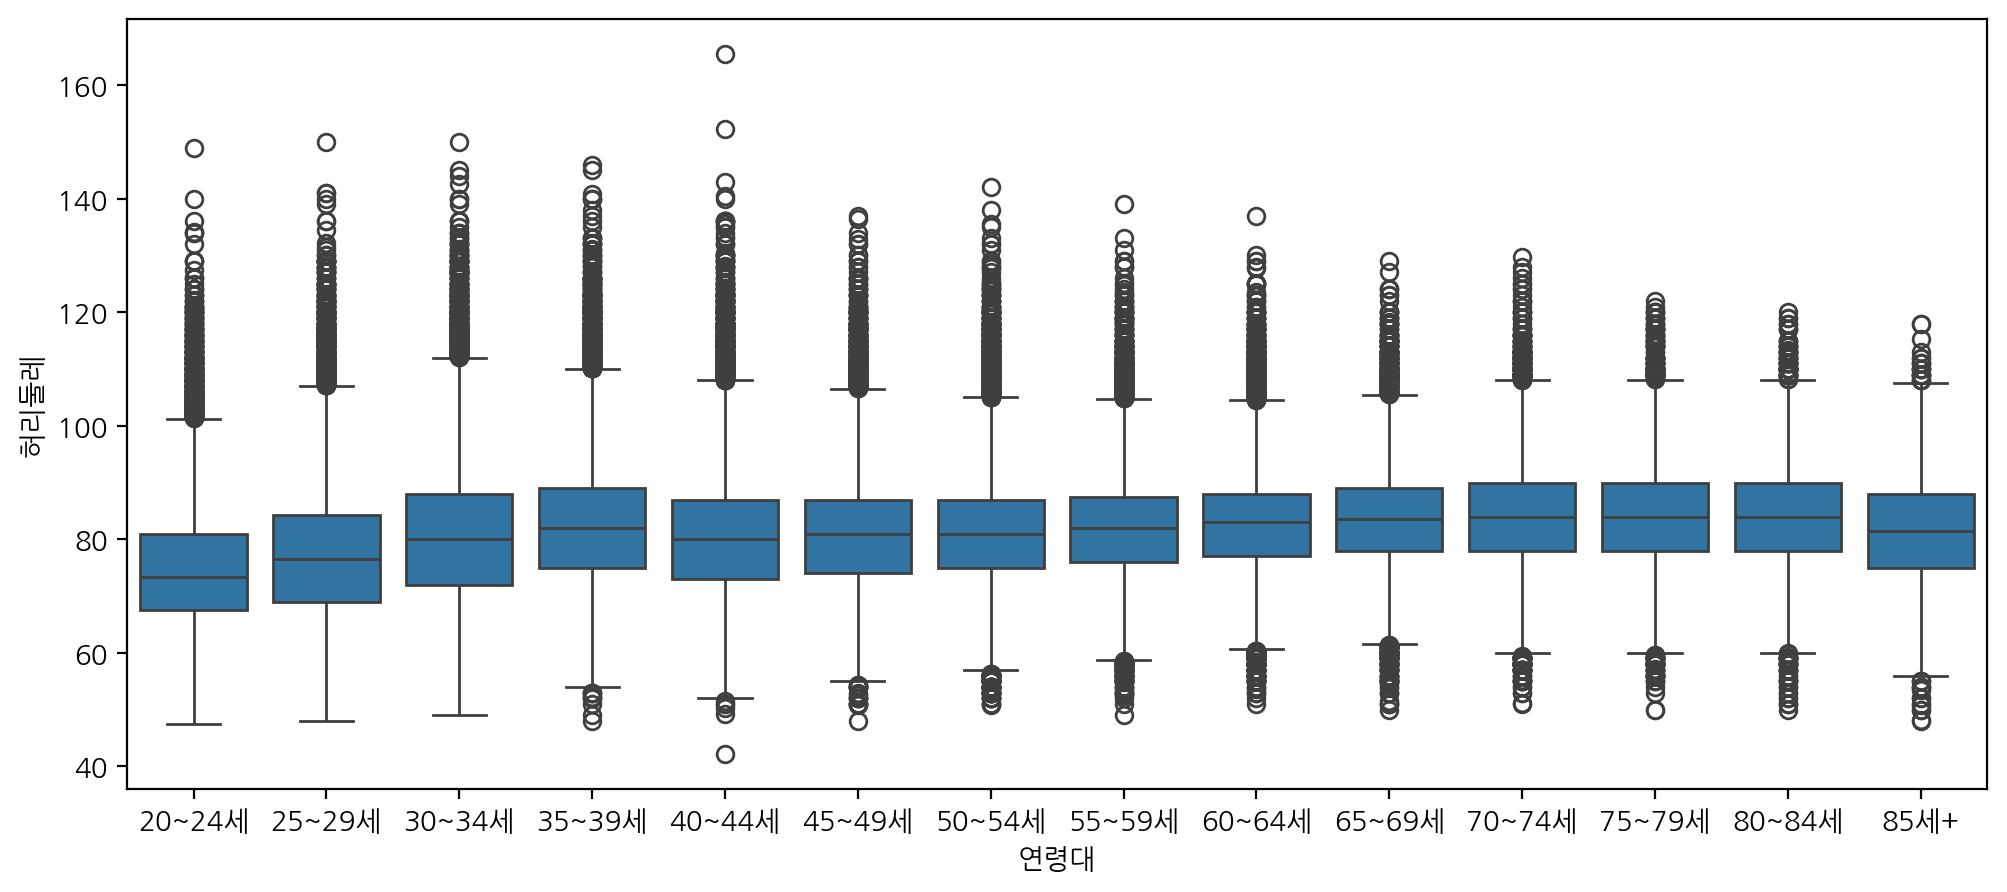

In [ ]:
# 결측치 및 이상치를 제거한 데이터 생성
df_no_outlier = df[(df["허리둘레"]<999) & (df["허리둘레"]>40)].copy()

# 연령대를 순서대로 정렬하기 위해 변수 생성
age_order = sorted(df["연령대"].unique())

# boxplot으로 연령대별 허리둘레 분포 확인하기
plt.figure(figsize=(12,5))
sns.boxplot(data=df_no_outlier, x="연령대", y="허리둘레", order=age_order)

### (2) 연령대별 분포 시각화
- 연령대에 따른 허리둘레 변화
- 각 성별에 따른 허리둘레 변화

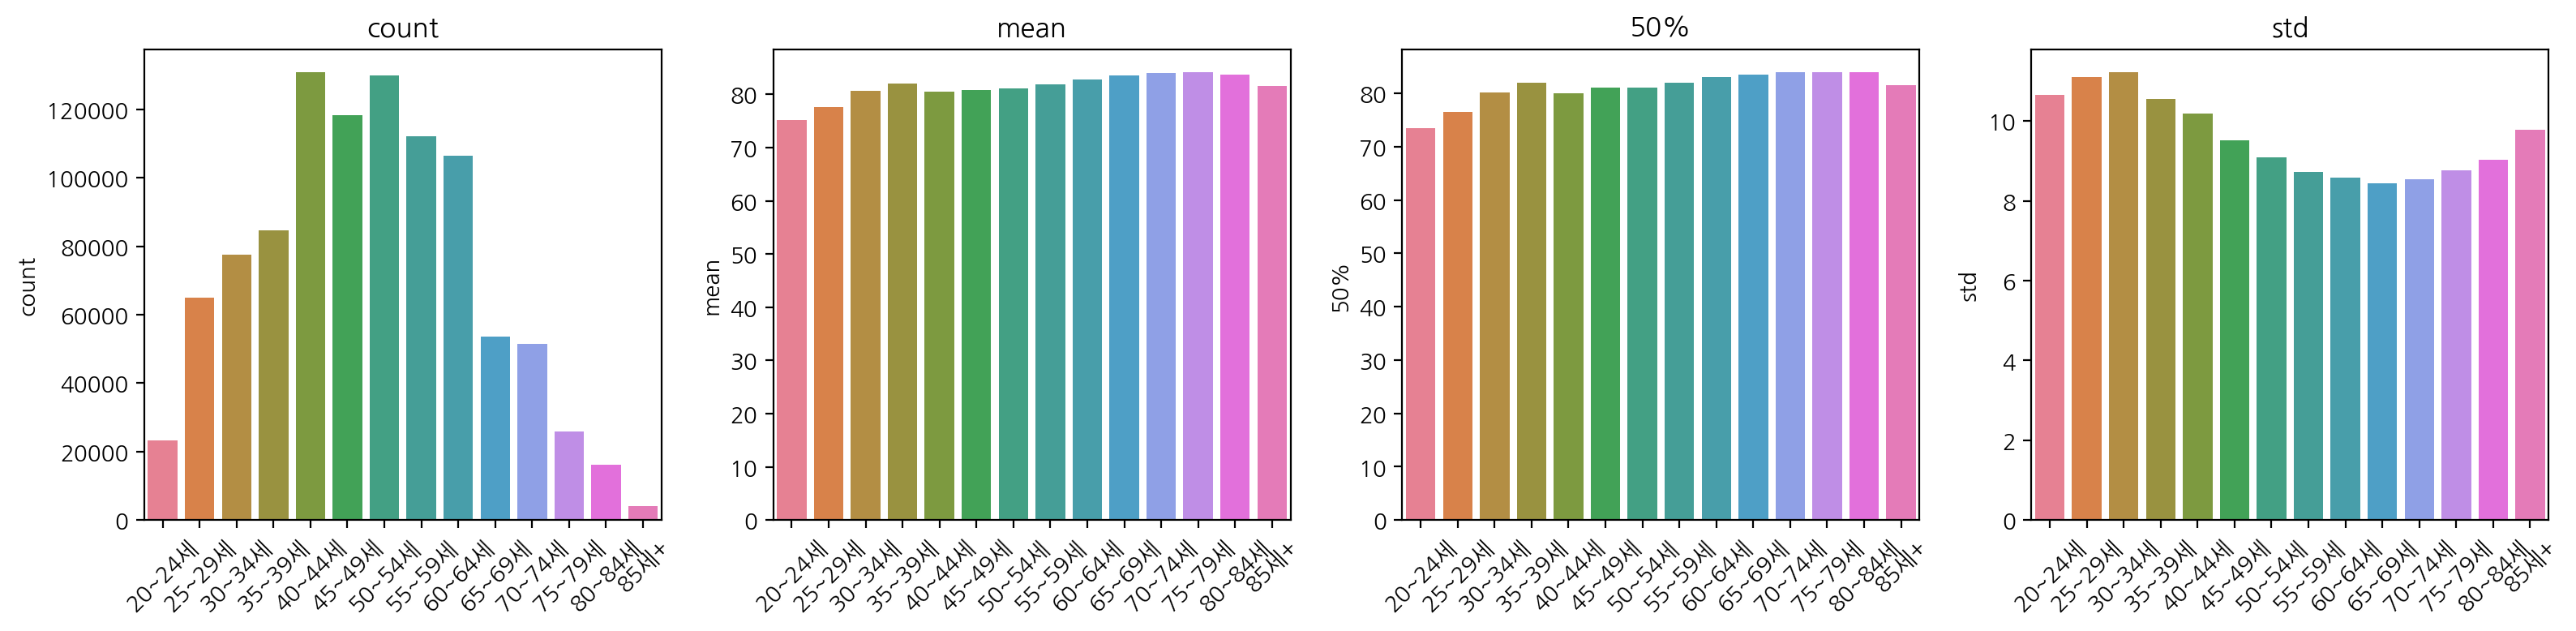

In [ ]:
# 기초통계량 시각화 : count, mean, 50%(median), std

# 사용할 컬럼을 리스트에 저장
col_list = ["count","mean","50%","std"]

# 이상치를 제거한 데이터의 기초통계량
df_describe2 = df_no_outlier.pivot_table(index="연령대", values="허리둘레", aggfunc="describe")

# 서브플롯 설정
fig, ax = plt.subplots(ncols=len(col_list), figsize=(16,4))

# 연령대 순서 : y축 정렬에 사용
age_order = sorted(df["연령대"].unique())

# 반복문으로 각 그래프 지정
for i in range(len(col_list)):
    col = col_list[i]
    sns.barplot(data=df_describe2, x=age_order, y=col, hue=age_order, ax=ax[i])
    ax[i].set_title(f"{col}")
    ax[i].tick_params(axis="x", rotation=45)

# 레이아웃 조정
plt.tight_layout()

# 출력
plt.show()

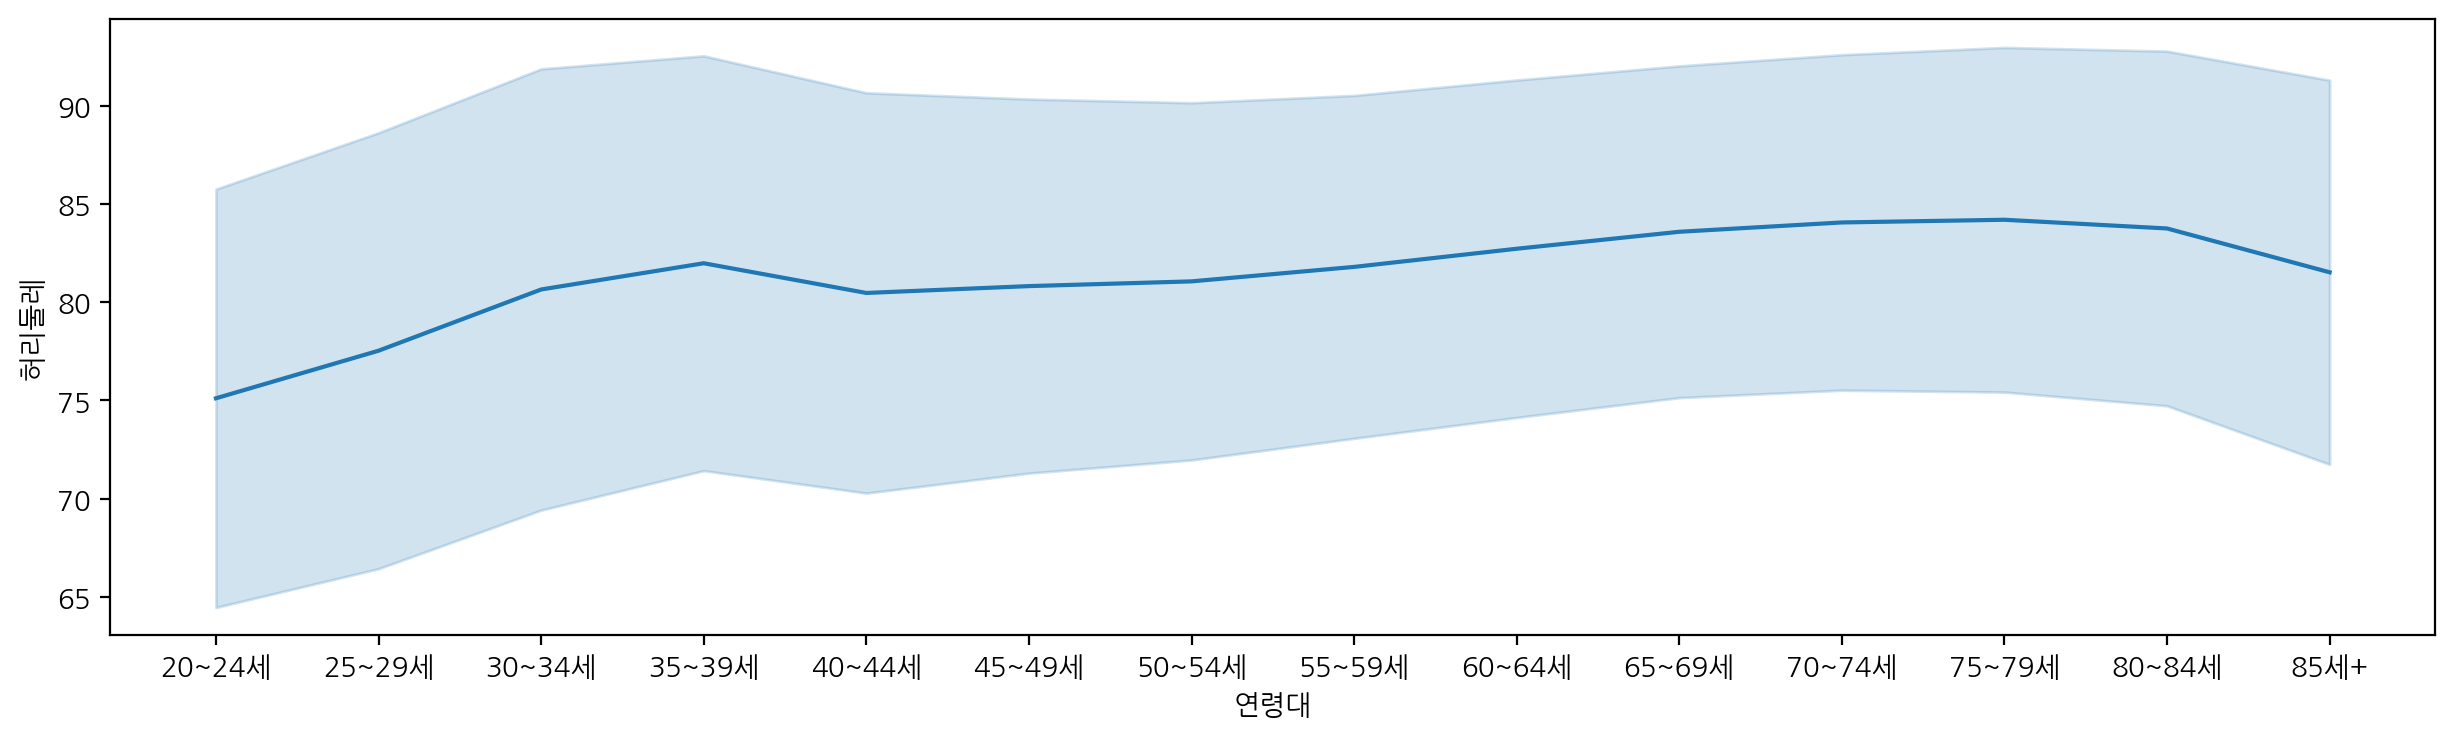

In [ ]:
# 연령대별 허리둘레의 변화
plt.figure(figsize=(15,4))
sns.lineplot(data=df_no_outlier.sort_values("연령대"), x="연령대", y="허리둘레", errorbar="sd")
plt.show()

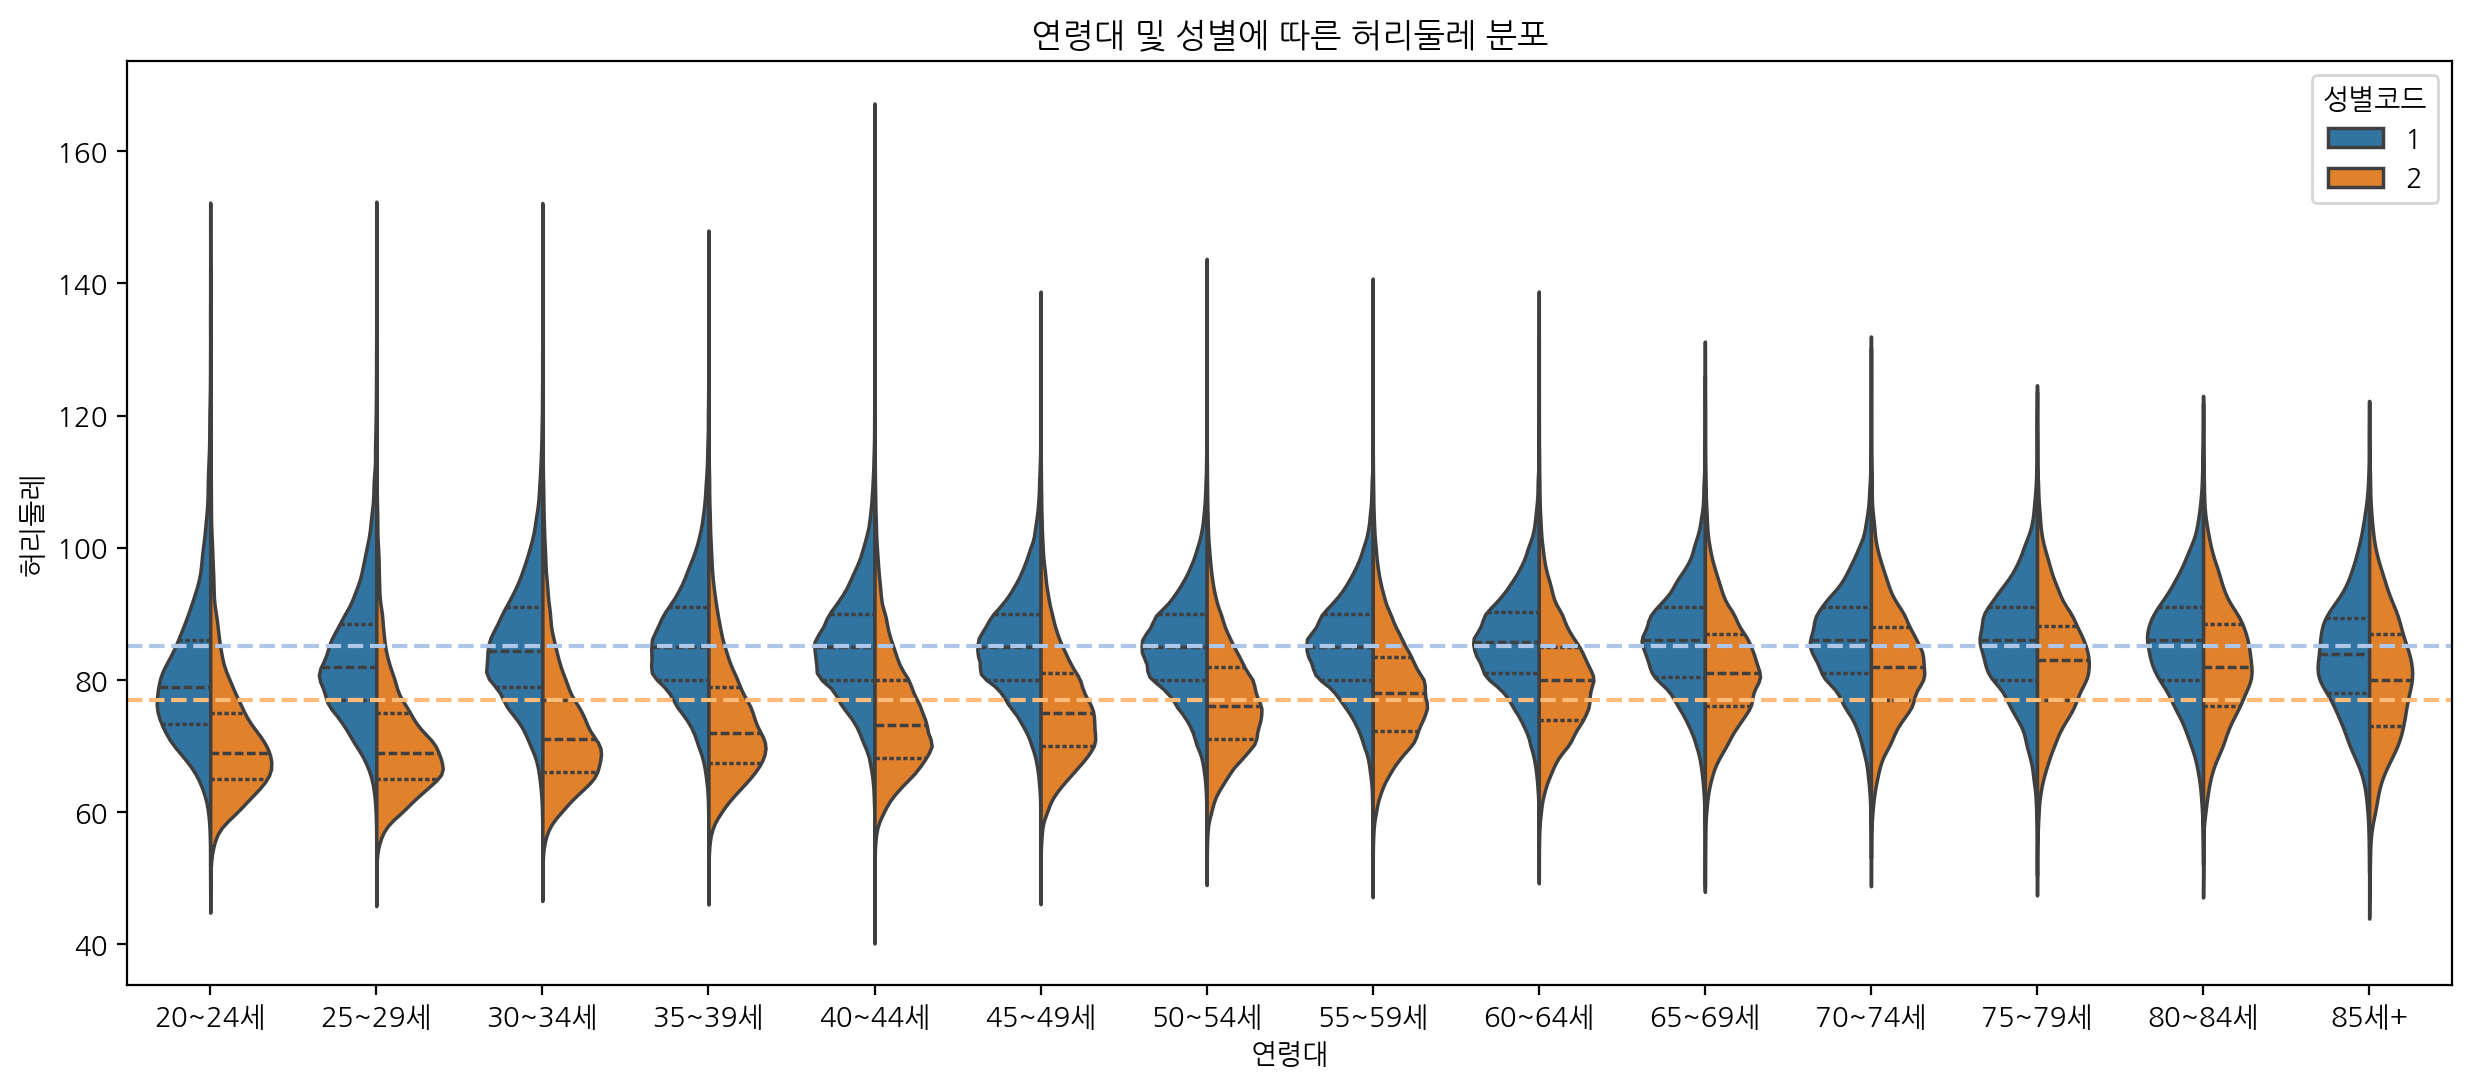

In [ ]:
# violinplot으로 분포 확인
plt.figure(figsize=(15,6))

# 이상치 제거한 데이터를 사용
data = df_no_outlier.sort_values("연령대")

# 성별에 따른 허리둘레의 분포 및 사분위수 표시
sns.violinplot(data=data, x="연령대", y="허리둘레", hue="성별코드", split=True, inner="quarter", palette="tab10")

# 평균선 출력
plt.axhline(y=data.loc[data["성별코드"]==1, "허리둘레"].mean(), linestyle="--", color=plt.cm.tab20(1))
plt.axhline(y=data.loc[data["성별코드"]==2, "허리둘레"].mean(), linestyle="--", color=plt.cm.tab20(3))

# 제목 설정 및 출력
plt.title("연령대 및 성별에 따른 허리둘레 분포")
plt.show()

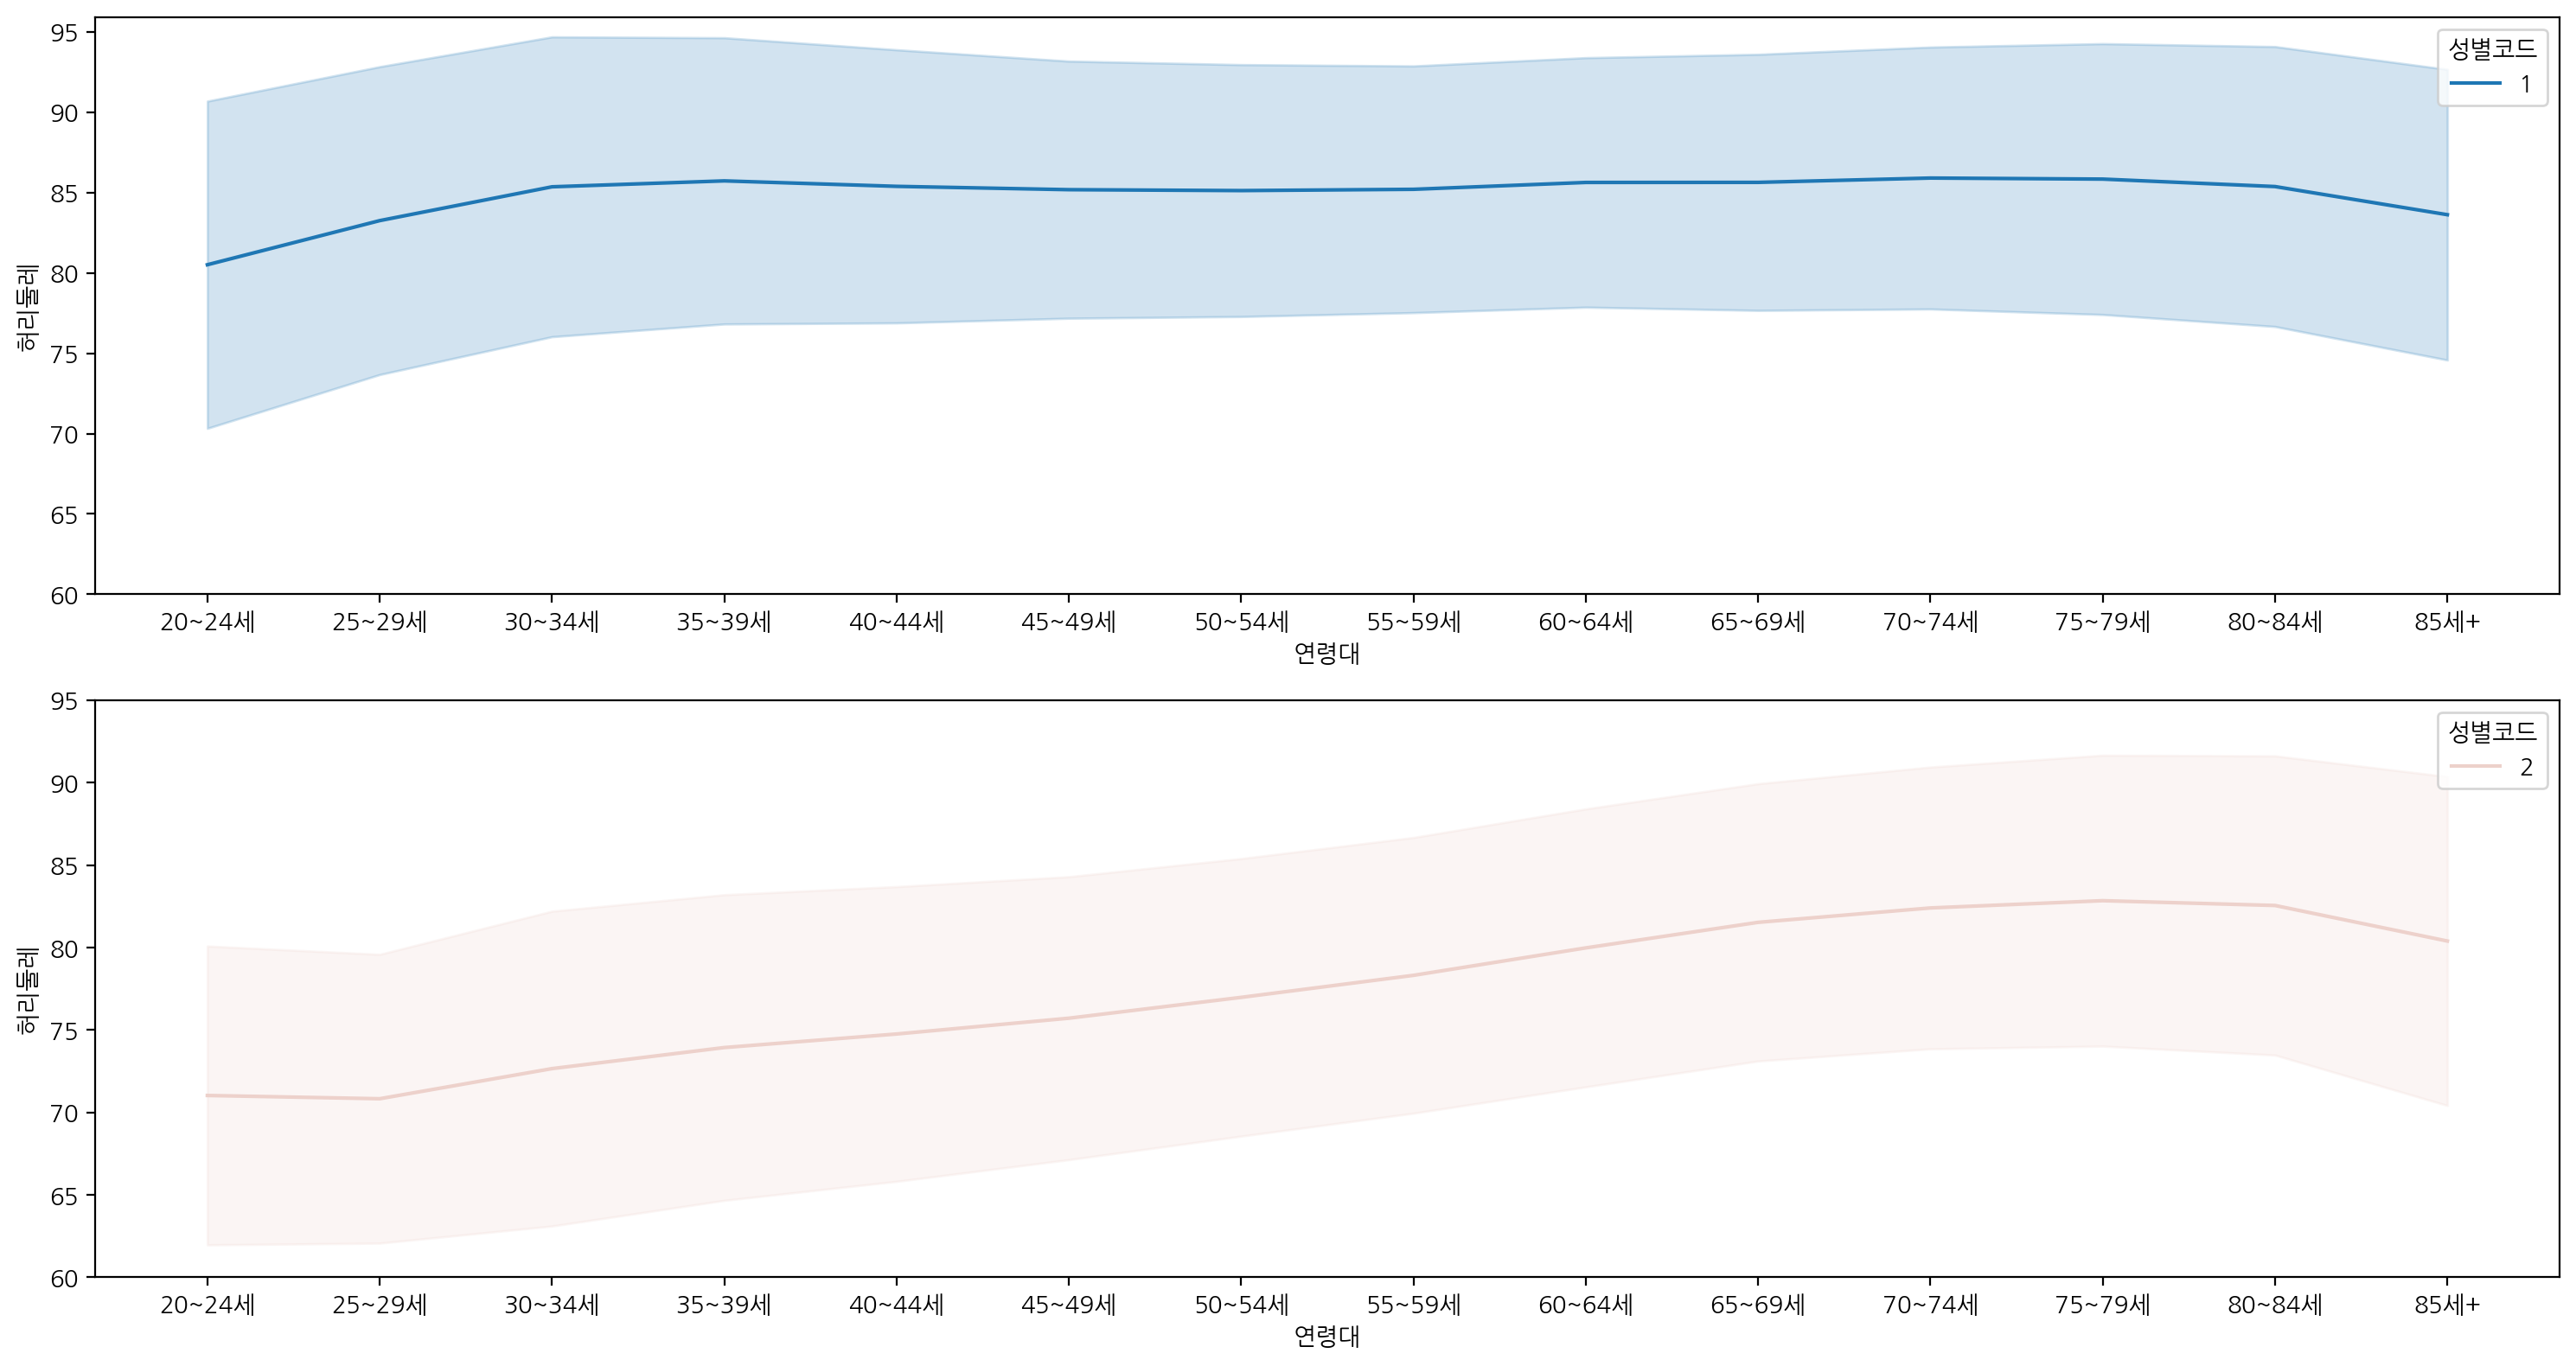

In [ ]:
# lineplot으로 변화 확인
fig, ax = plt.subplots(nrows=2, figsize=(15,8))

# 성별코드별로 그래프 시각화
for i in range(2):
    sns.lineplot(data=data[data["성별코드"]==(i+1)], x="연령대", y="허리둘레", hue="성별코드", errorbar="sd", ax=ax[i])

    # y축 동일하게 고정
    ax[i].set_yticks(np.arange(60,100,5))

# 출력
plt.tight_layout()
plt.show()

### (3) result
**[전체]**
- 연령대가 높아질수록 **허리둘레가 증가하는 경향**을 보이며, 2~30대는 타 연령대보다 더 다양하게 분포되어 있다. (= 표준편차가 크다.)
- **20대**의 허리둘레가 타 연령대에 비해 **작은** 것을 확인할 수 있으며, **가설검정**을 통해 그 차이가 유의미한지 확인해 볼 필요가 있다.
---
**[성별]**
- 전반적으로 남성의 허리둘레가 여성의 허리둘레보다 크다.
- **남성**은 30대부터 연령대에 따른 **변화가 크지 않고 일정한 편**이다.
- **여성**은 전 연령대에 걸쳐, 연령대가 높아질수록 **허리둘레가 증가하는 경향**을 보인다.

#📌 Q2
"음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

In [ ]:
# 상관계수에 사용할 컬럼 추출
df2 = ['음주여부', '흡연상태', '연령대코드(5세단위)', '성별코드']

# 상관계수 계산
df_corr = df[df2].corr()

# 결과 출력
df_corr

,음주여부,흡연상태,연령대코드(5세단위),성별코드
음주여부,1.000000,0.352014,-0.283296,-0.368630
흡연상태,0.352014,1.000000,-0.125714,-0.588491
연령대코드(5세단위),-0.283296,-0.125714,1.000000,0.080093
성별코드,-0.368630,-0.588491,0.080093,1.000000


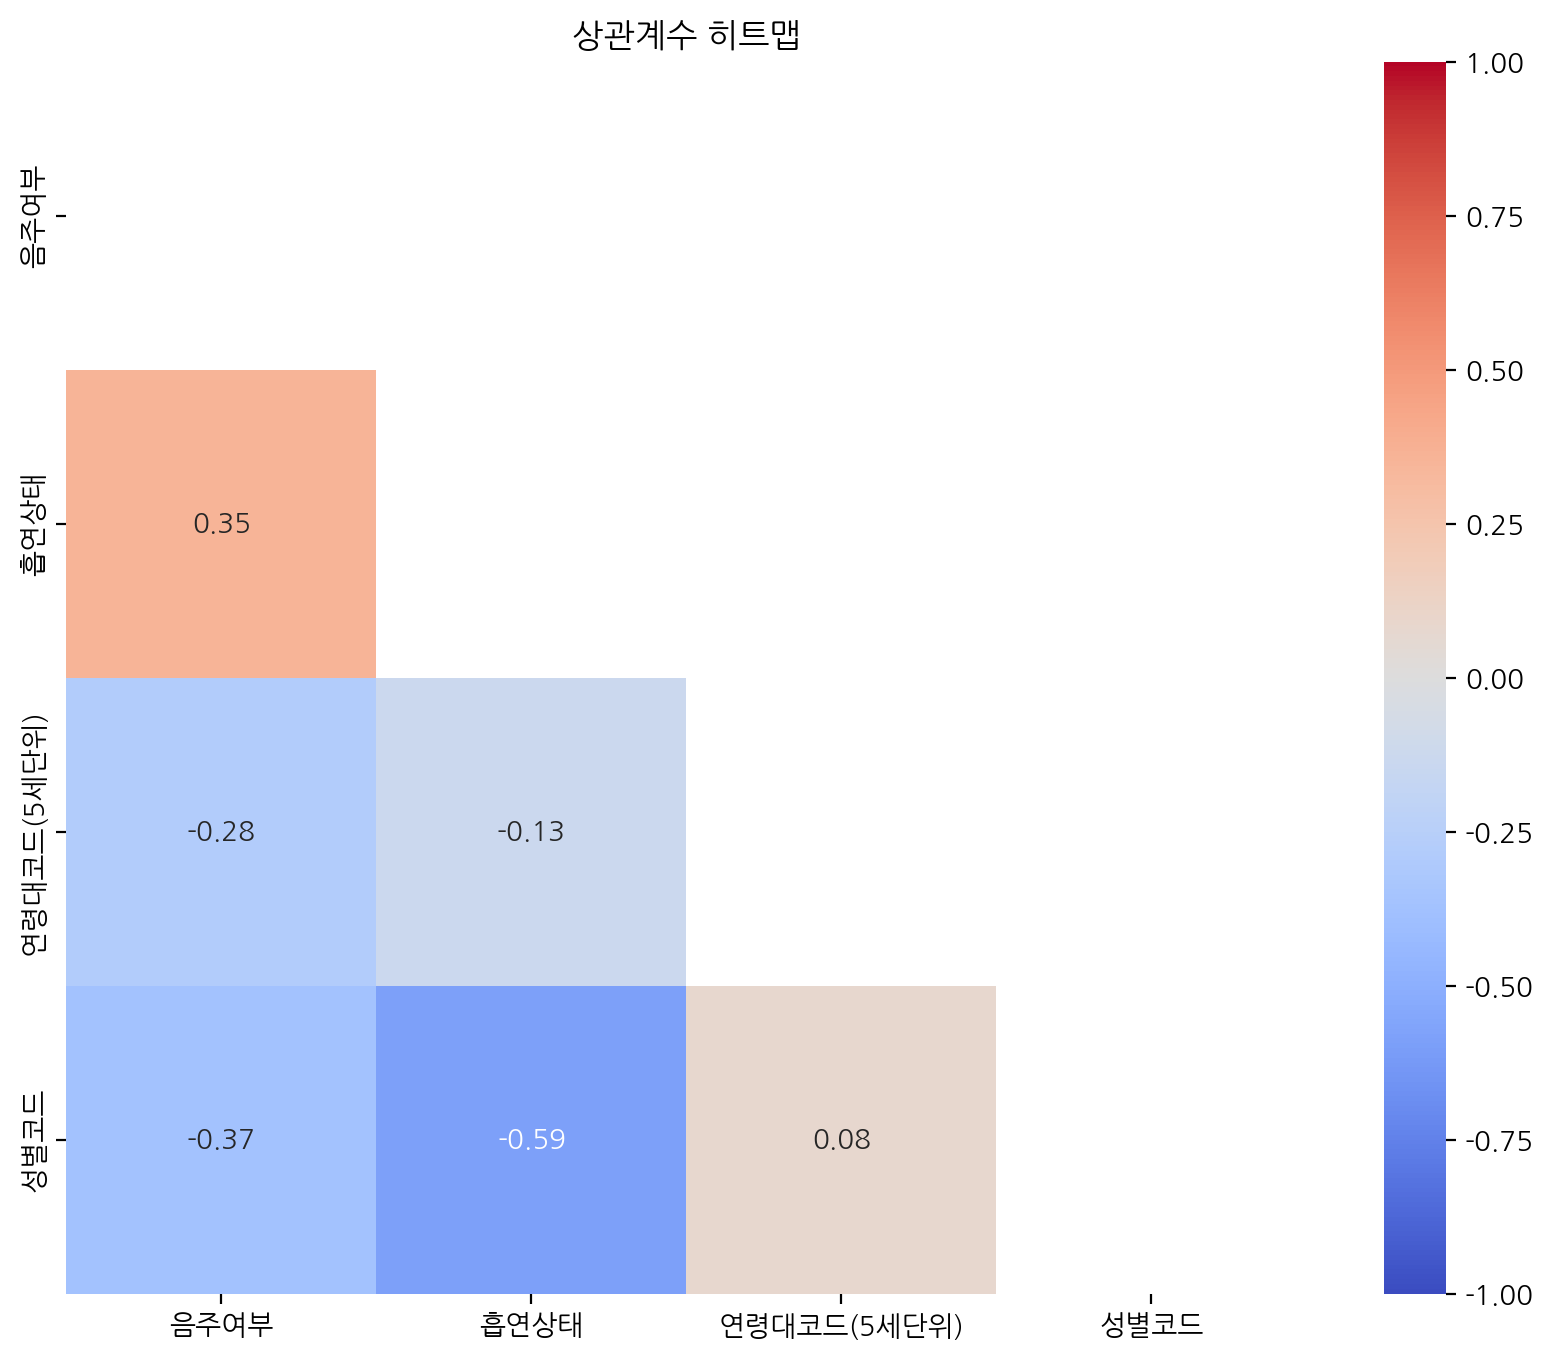

In [ ]:
# 하단 삼각형 마스크 생성
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('상관계수 히트맵')
plt.show()

## Analyze
- 음주와 흡연은 약간의 양의 상관관계(`0.35`)가 있는 것으로 보인다.
- 성별과 흡연상태에 음의 상관관계(`-0.59`)가 있다.
- 성별과 음주여부에 약간의 음의 상관관계(`-0.37`)가 있다.
- Q3와 추가 분석을 통해 더 알아보자.

#📌 Q3
흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?

건강보험에서 제공하고 있는 데이터는 용량을 줄이기 위해 대부분의 데이터를 숫자 형태로 제공하고 있습니다. replace 기능을 사용하면 딕셔너리의 값을 의미하는 문자 형태로 변경해 볼 수 있습니다. 다음 제공되는 딕셔너리 값을 사용하여 숫자가 의미하는 문자 형태로 변경한 뒤 전체 데이터에서 음주와 흡연에 대한 교차 테이블을 구해 각 해당 빈도수를 구하고 시각화 해주세요!
##### # 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
##### # 음주 0(마시지 않는다), 1(마신다)
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

##### # df["흡연"]
##### # df["음주"]

- groupby, pivot_table로 구할 수도 있지만, 수업에서는 다루지 않았던 pandas의 crosstab 기능을 사용해서도 비교적 쉽게 구할 수 있습니다.
- crosstab 을 사용할 때는 다음의 문서를 참고하여 구해보세요. pandas.crosstab — pandas documentation
- 그리고 막대그래프를 통해 결과를 시각화해주세요!
* 시각화를 할 때 그래프의 스타일이나 막대의 색상 등이 달라도 상관 없으니 사용하고 싶은 스타일을 적용해서 시각화해도 좋습니다.

In [ ]:
# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주 0(마시지 않은다), 1(마신다)
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

# 딕셔너리를 사용해 변환한 컬럼 생성
df["흡연"] = df["흡연상태"].replace(smoke)
df["음주"] = df["음주여부"].replace(drink)

### groupby 활용

In [ ]:
# groupby를 사용하여 교차 테이블 생성
groupby = df.groupby(['음주', '흡연']).size().unstack()
groupby.index.name = '음주'
crosstab.columns.name = '흡연'

# 결과 확인
groupby

,끊음,흡연안함,흡연중
음주,,,
마심,120779,213743,162166
안마심,55334,394503,52845


### pivot_table 활용

In [ ]:
# pivot_table을 사용하여 교차 테이블 생성
pivot_table = pd.pivot_table(df, index='음주', columns='흡연', aggfunc='size', fill_value=0)
pivot_table.index.name = '음주'
crosstab.columns.name = '흡연'

# 결과 확인
pivot_table

,끊음,흡연안함,흡연중
음주,,,
마심,120779,213743,162166
안마심,55334,394503,52845


### crosstab 활용

In [ ]:
# 교차 테이블 생성
crosstab = pd.crosstab(df['음주'], df['흡연'])
crosstab.index.name = '음주'
crosstab.columns.name = '흡연'

# 교차 테이블 출력
crosstab

흡연,끊음,흡연안함,흡연중
음주,,,
마심,120779,213743,162166
안마심,55334,394503,52845


##딕셔너리 사용 전 그래프

<Axes: xlabel='흡연상태', ylabel='count'>

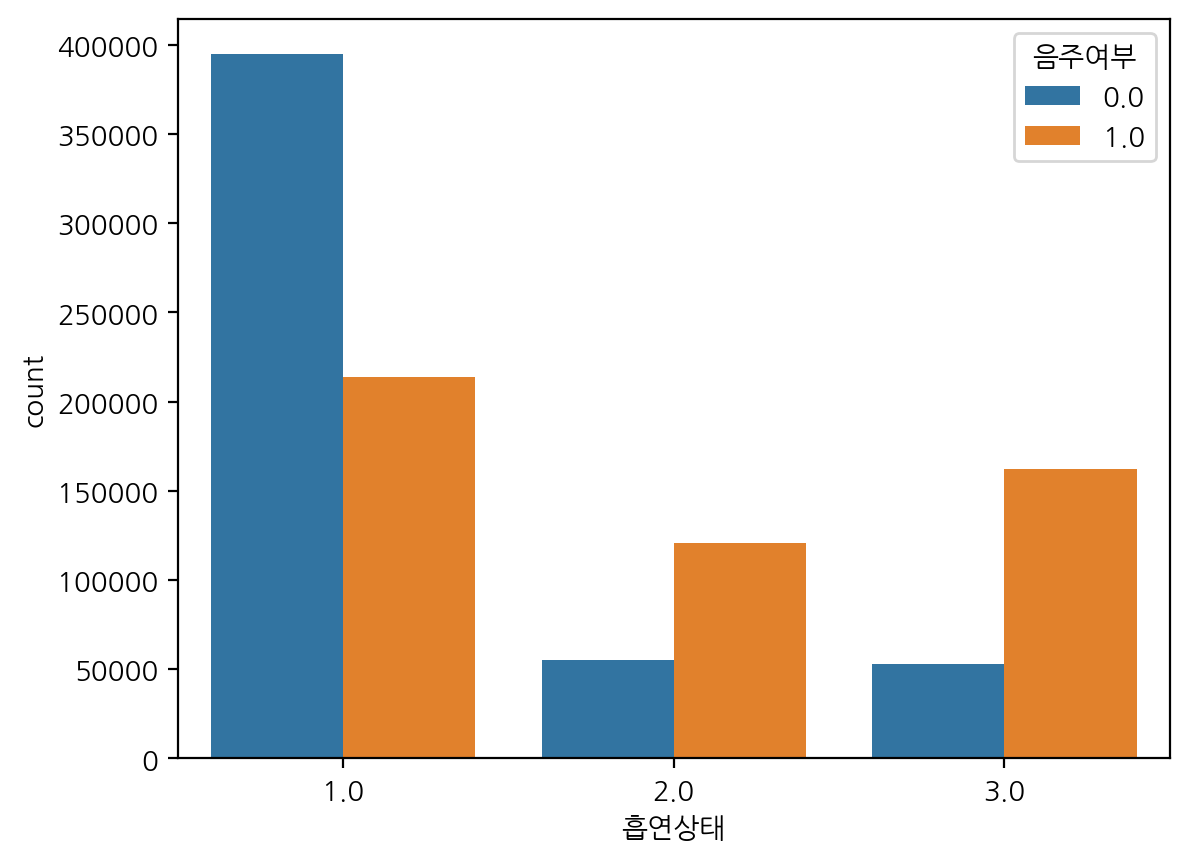

In [ ]:
sns.countplot(data=df, x="흡연상태", hue="음주여부")

## 딕셔너리 사용 후 그래프

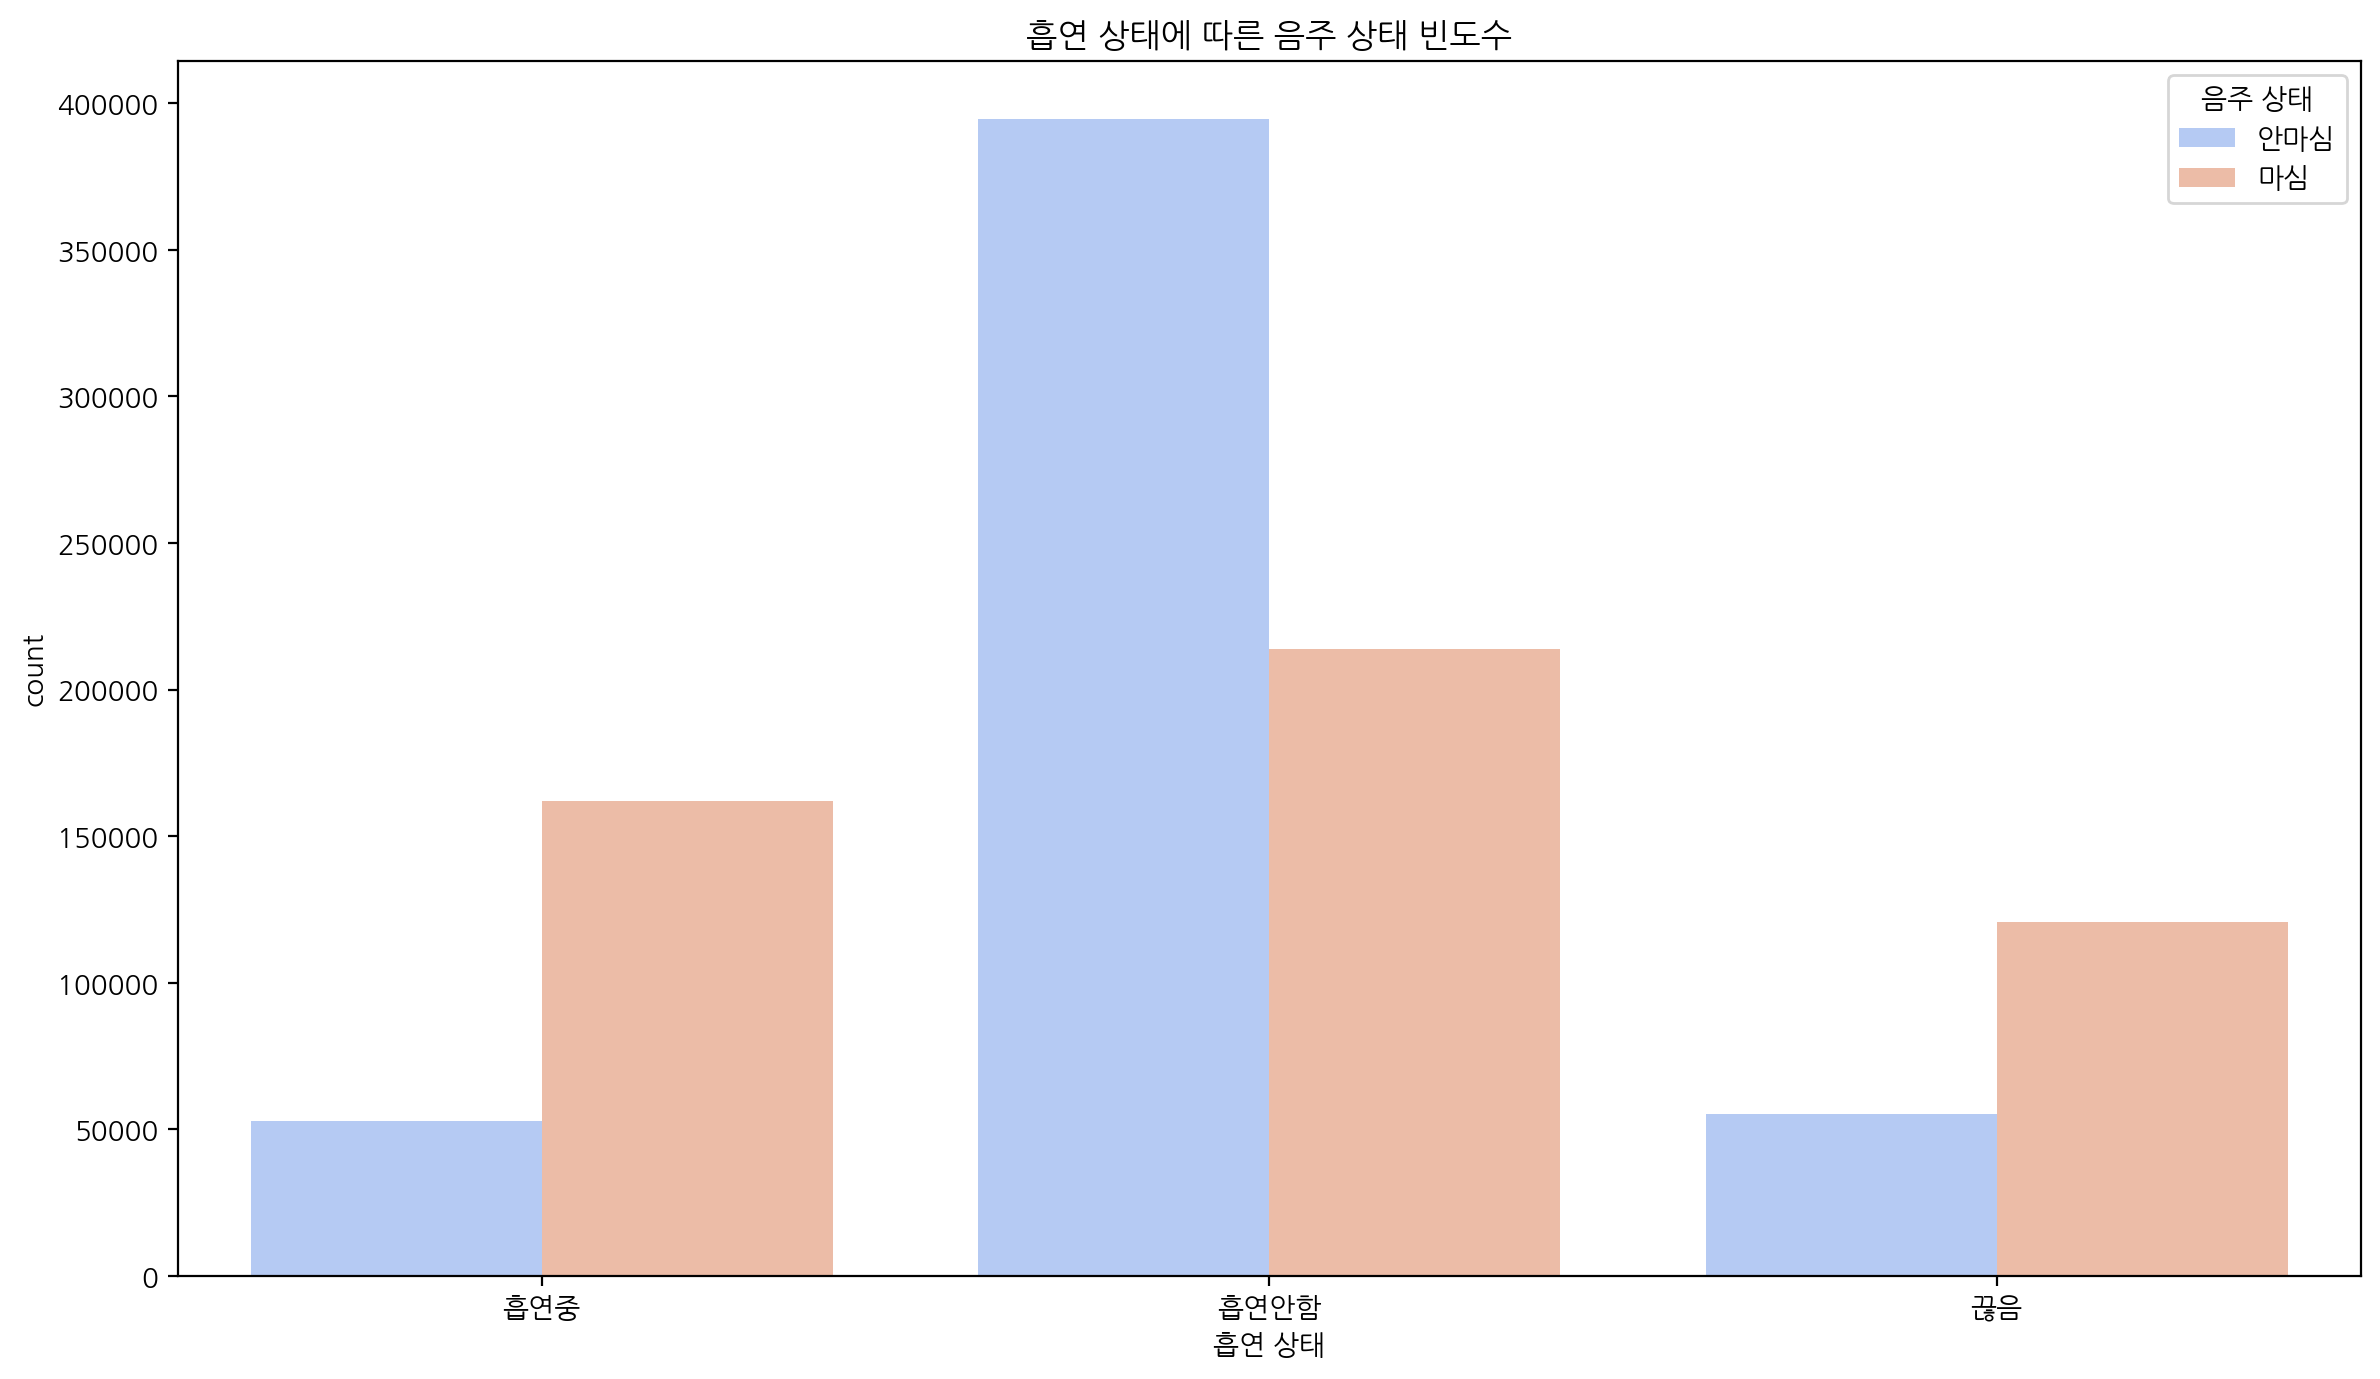

In [ ]:
# 막대 그래프 시각화
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='흡연', hue='음주', palette='coolwarm')

# 그래프 제목 및 레이블 설정
plt.title('흡연 상태에 따른 음주 상태 빈도수')
plt.xlabel('흡연 상태')
plt.ylabel('count')
plt.legend(title='음주 상태')
plt.tight_layout()

# 그래프 표시
plt.show()

## (+) 스택형 막대 그래프

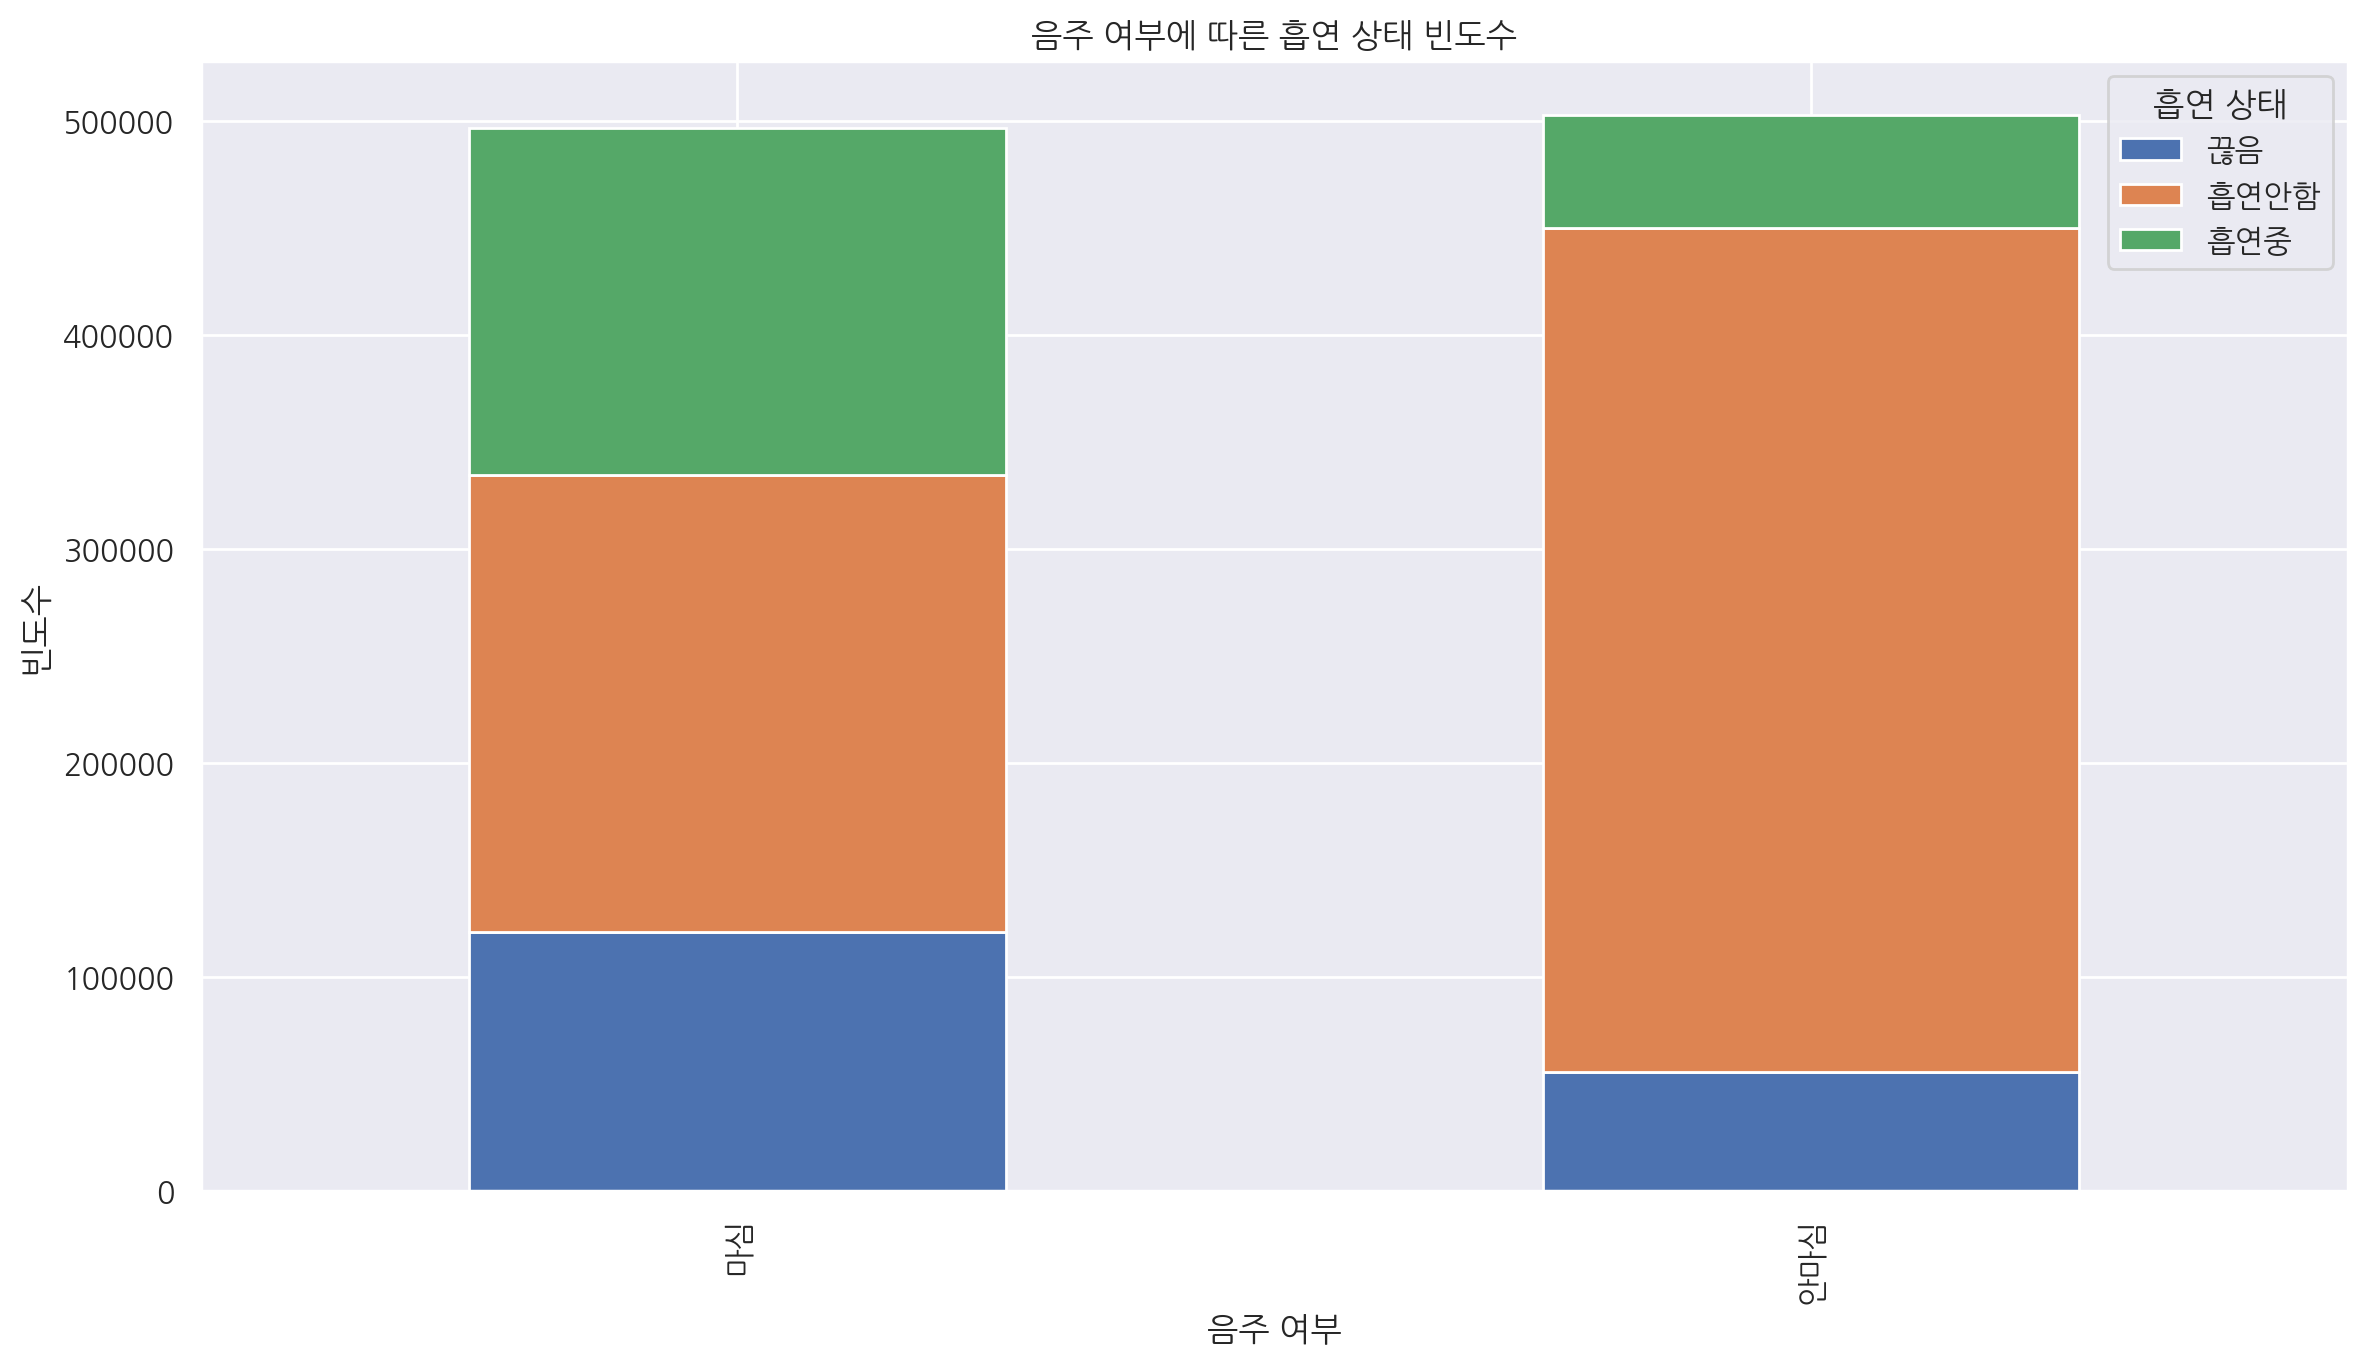

In [ ]:
# 스택형 막대 그래프 시각화
groupby.plot(kind='bar', stacked=True, figsize=(12, 7))

# 그래프 제목 및 레이블 설정
plt.title('음주 여부에 따른 흡연 상태 빈도수')
plt.xlabel('음주 여부')
plt.ylabel('빈도수')
plt.legend(title='흡연 상태')
plt.tight_layout()

# 그래프 표시
plt.show()

## (+) 히트맵 그래프

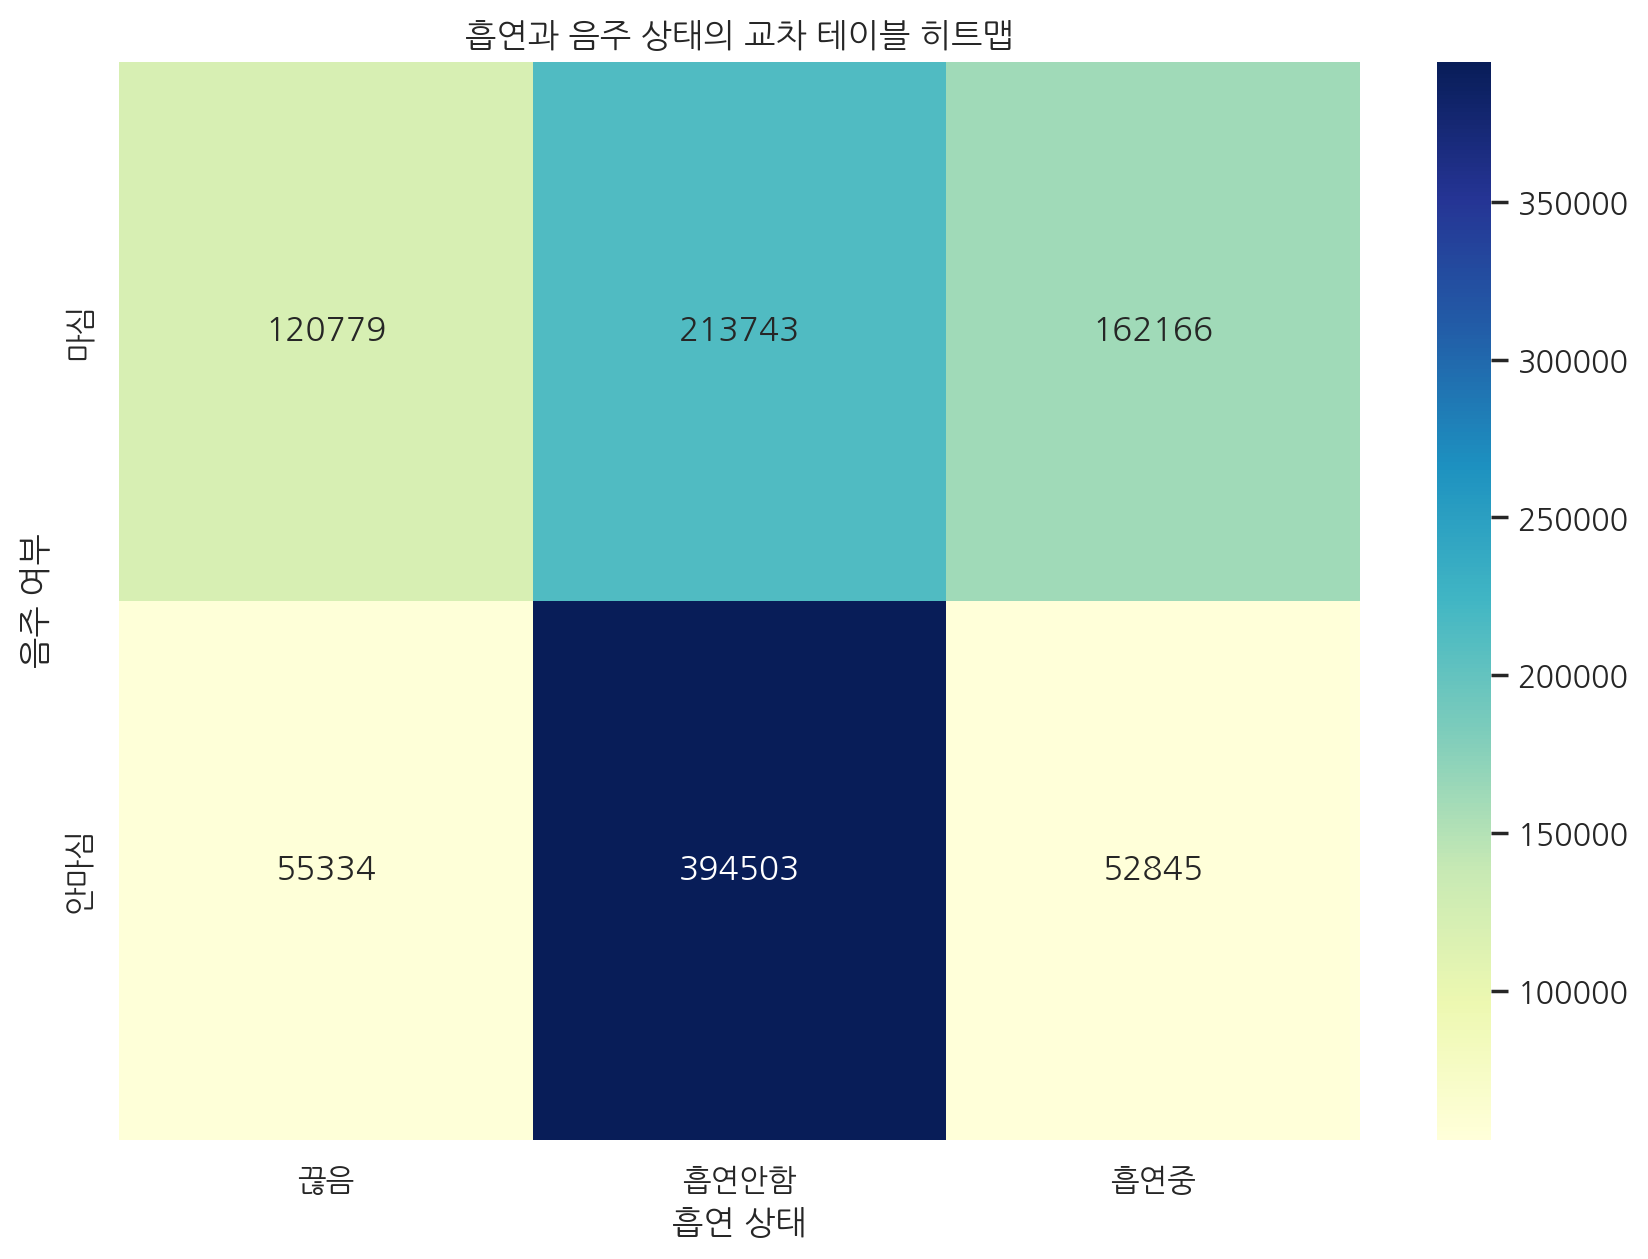

In [ ]:
# 히트맵 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')

# 그래프 제목 및 레이블 설정
plt.title('흡연과 음주 상태의 교차 테이블 히트맵')
plt.xlabel('흡연 상태')
plt.ylabel('음주 여부')

# 그래프 표시
plt.show()

## (+) 흡연 경험이 있는 사람의 음주 여부

흡연 경험과 음주 간 상관계수 : 0.36



<Axes: xlabel='음주', ylabel='count'>

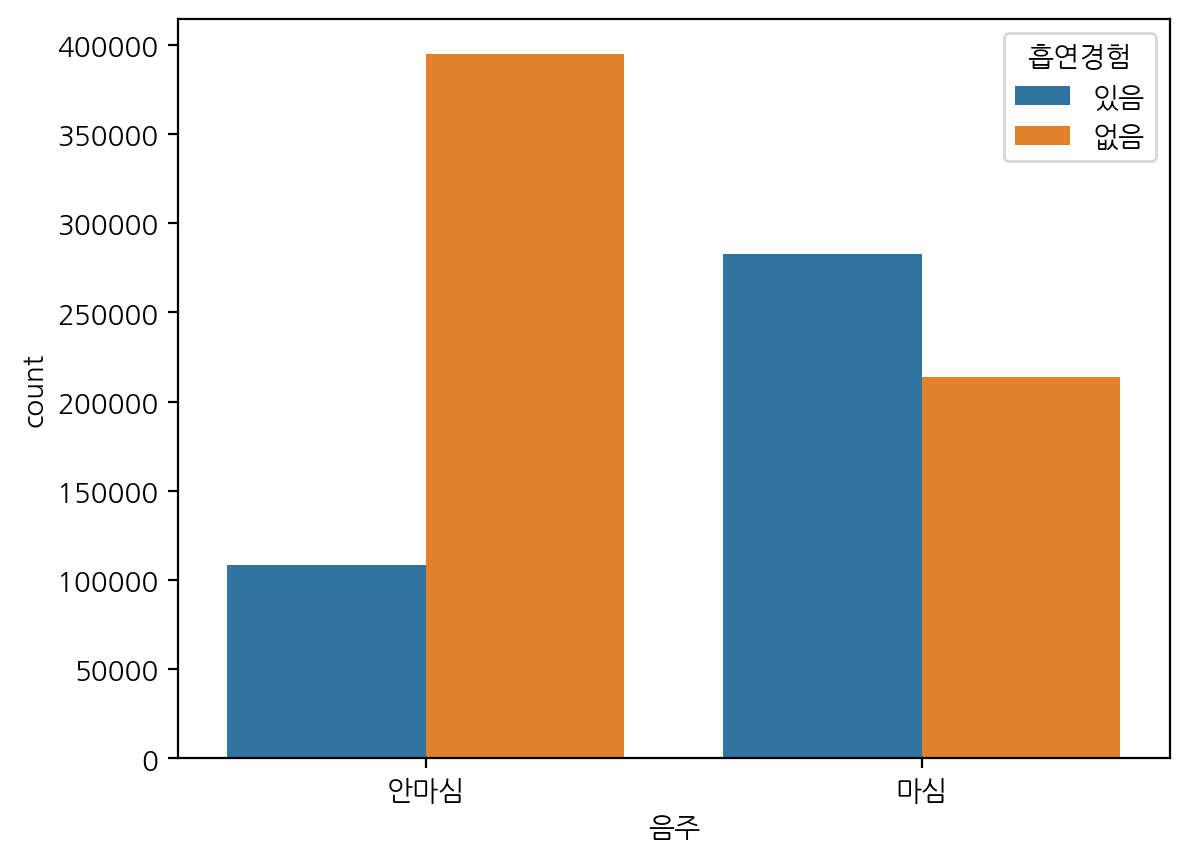

In [ ]:
# 흡연 경험 컬럼 생성
# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
df["흡연경험여부"] = df["흡연상태"].replace({1:0, 2:1, 3:1})
df["흡연경험"] = df["흡연경험여부"].replace({0:"없음",1:"있음"})

# 상관계수 출력
corr = df.corr(numeric_only=True).loc["흡연경험여부","음주여부"].round(2)
print(f"흡연 경험과 음주 간 상관계수 : {corr}\n")

# 막대그래프 시각화

sns.countplot(data=df, x="음주", hue="흡연경험")

## (+) 성별에 따른 흡연 상태

In [ ]:
# 보다 직관적으로 확인하기 위해 성별 컬럼을 생성
gender = {1:"남자", 2:"여자"}
df["성별"] = df["성별코드"].replace(gender)

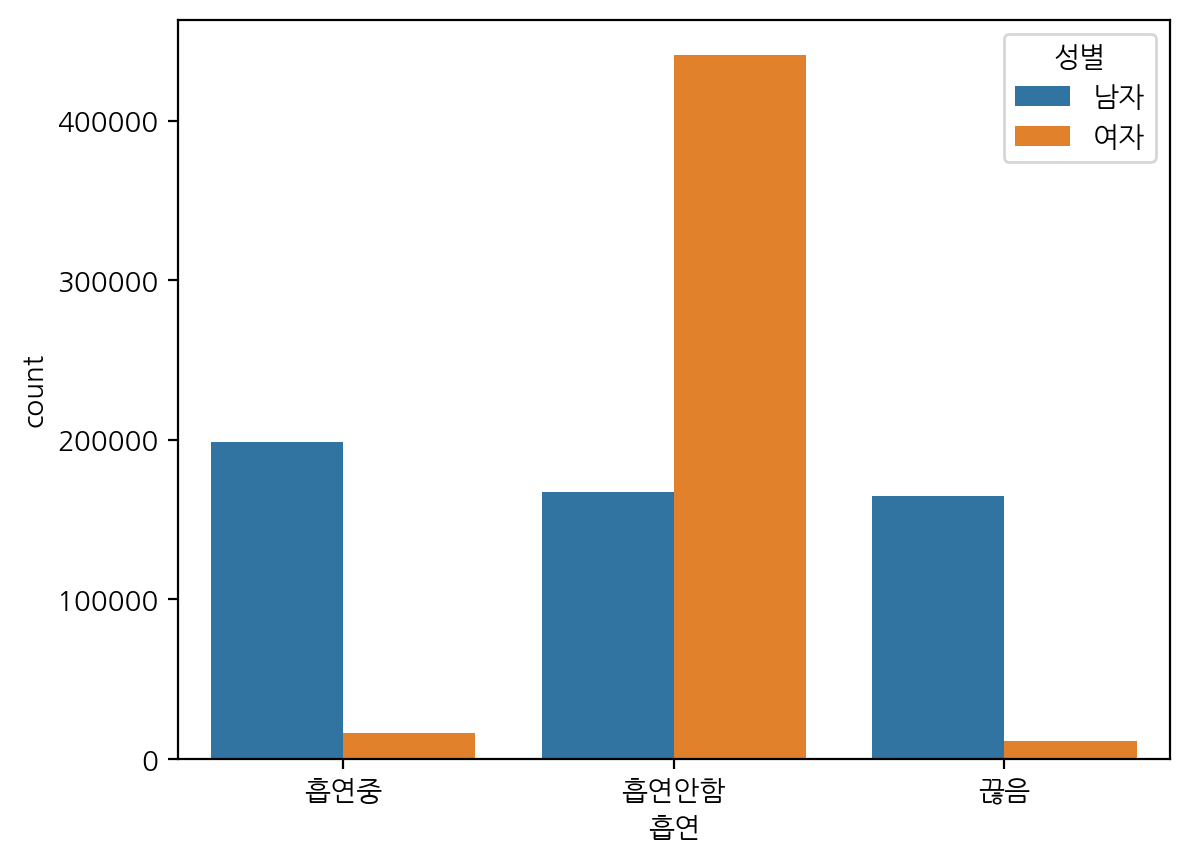

In [ ]:
# 흡연 - 성별
c = sns.countplot(data=df, x="흡연", hue="성별", palette="tab10")

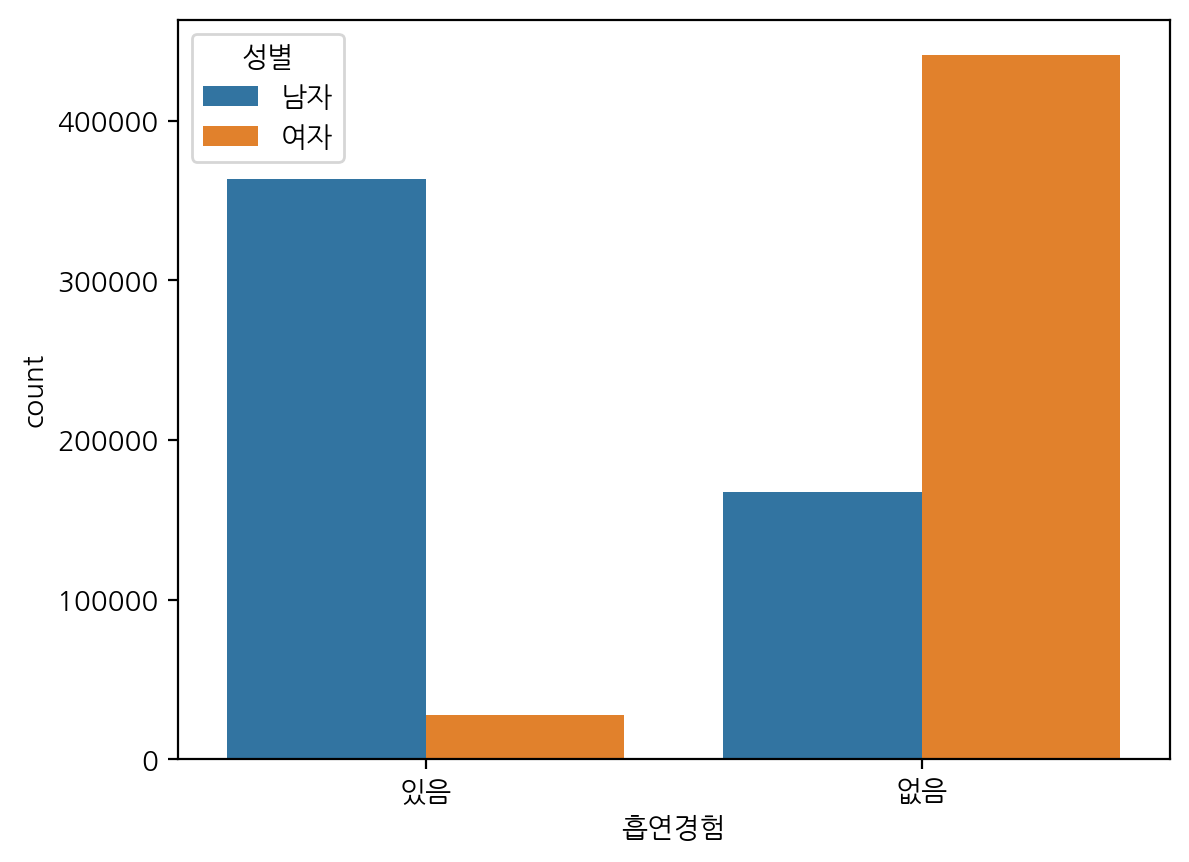

In [ ]:
# 흡연경험 - 성별
c = sns.countplot(data=df, x="흡연경험", hue="성별", palette="tab10")

- 여성일 때 흡연하지 않는 경우가 훨씬 많고, 남성은 흡연 중인 경우가 가장 많았으나 각 상태의 수가 비슷한 편이었다.
- 남성의 경우 흡연 경험이 있는 경우가 여성에 비해 훨씬 많았다.

## (+) 성별에 따른 음주 여부

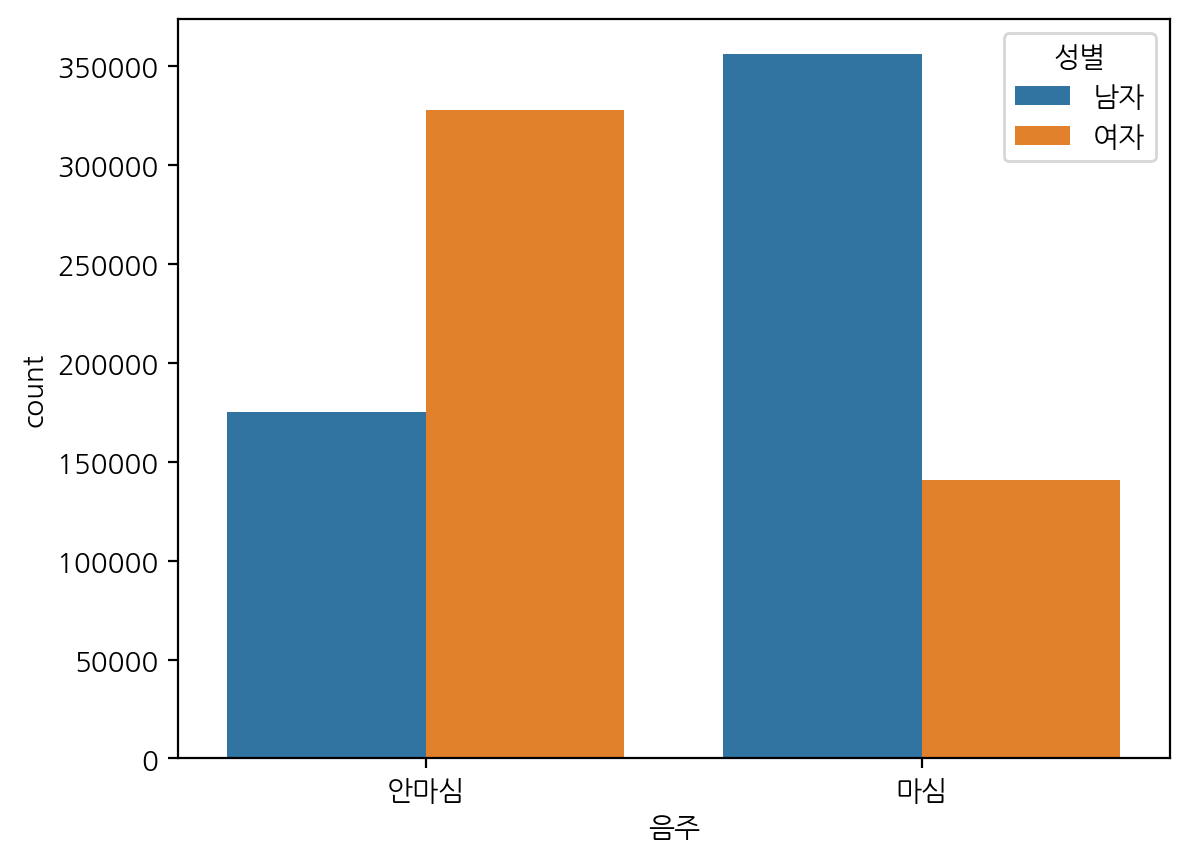

In [ ]:
# 음주 - 성별
c = sns.countplot(data=df, x="음주", hue="성별", palette="tab10")

- 남성은 음주하는 경향이, 여성은 음주하지 않는 경향이 더 크다.

## Analyze

- 흡연과 음주 상태의 상관 관계: <br>
흡연 상태와 음주 여부 간의 crosstab을 통해 흡연과 음주가 상호 연관된 패턴을 식별할 수 있습니다. 예를 들어, 흡연을 하지 않는 사람과 음주를 하지 않는 조합이 가장 많은걸 알 수 있었고, 흡연중 또는 끊음과 음주의 조합이 높은걸로 보아 흡연하는 사람들이 대체로 음주를 하는 경향이 있거나 흡연을 그만둔 사람들이 음주를 하는 경향이 있음을 알 수 있습니다.


#📌 Q4
체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!

- 체중이 120Kg 이 넘는다면 비만으로 건강관리가 필요합니다. 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요! (이때 120Kg 도 포함되게 구합니다.) 그래프의 설정과 seaborn 버전에 따라 여백이나 회귀선의 시작과 끝점에 차이가 있을 수 있습니다.

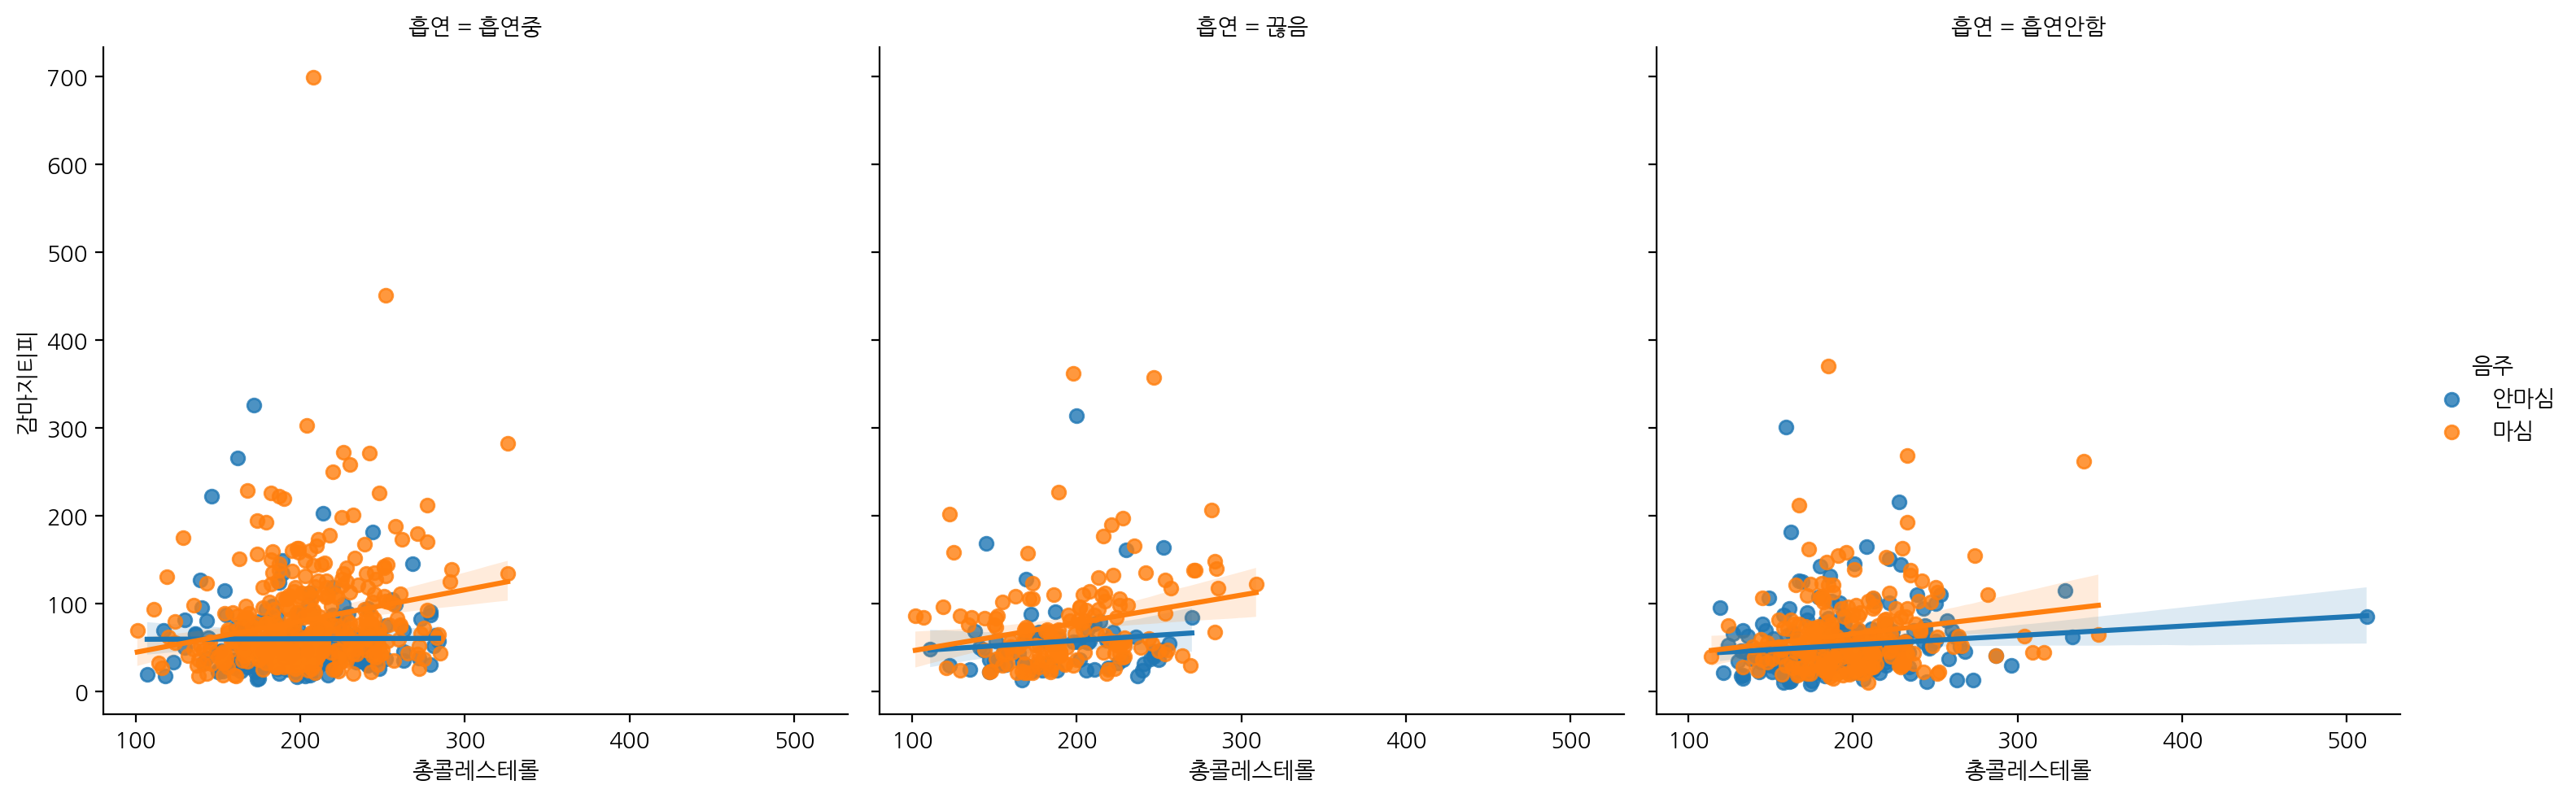

In [ ]:
# 120kg 이상 데이터 추출
df_over120 = df[df["체중(5Kg 단위)"] >= 120].copy()

# 산점도 시각화
p = sns.lmplot(data=df_over120, x="총콜레스테롤", y="감마지티피", col="흡연", hue="음주")

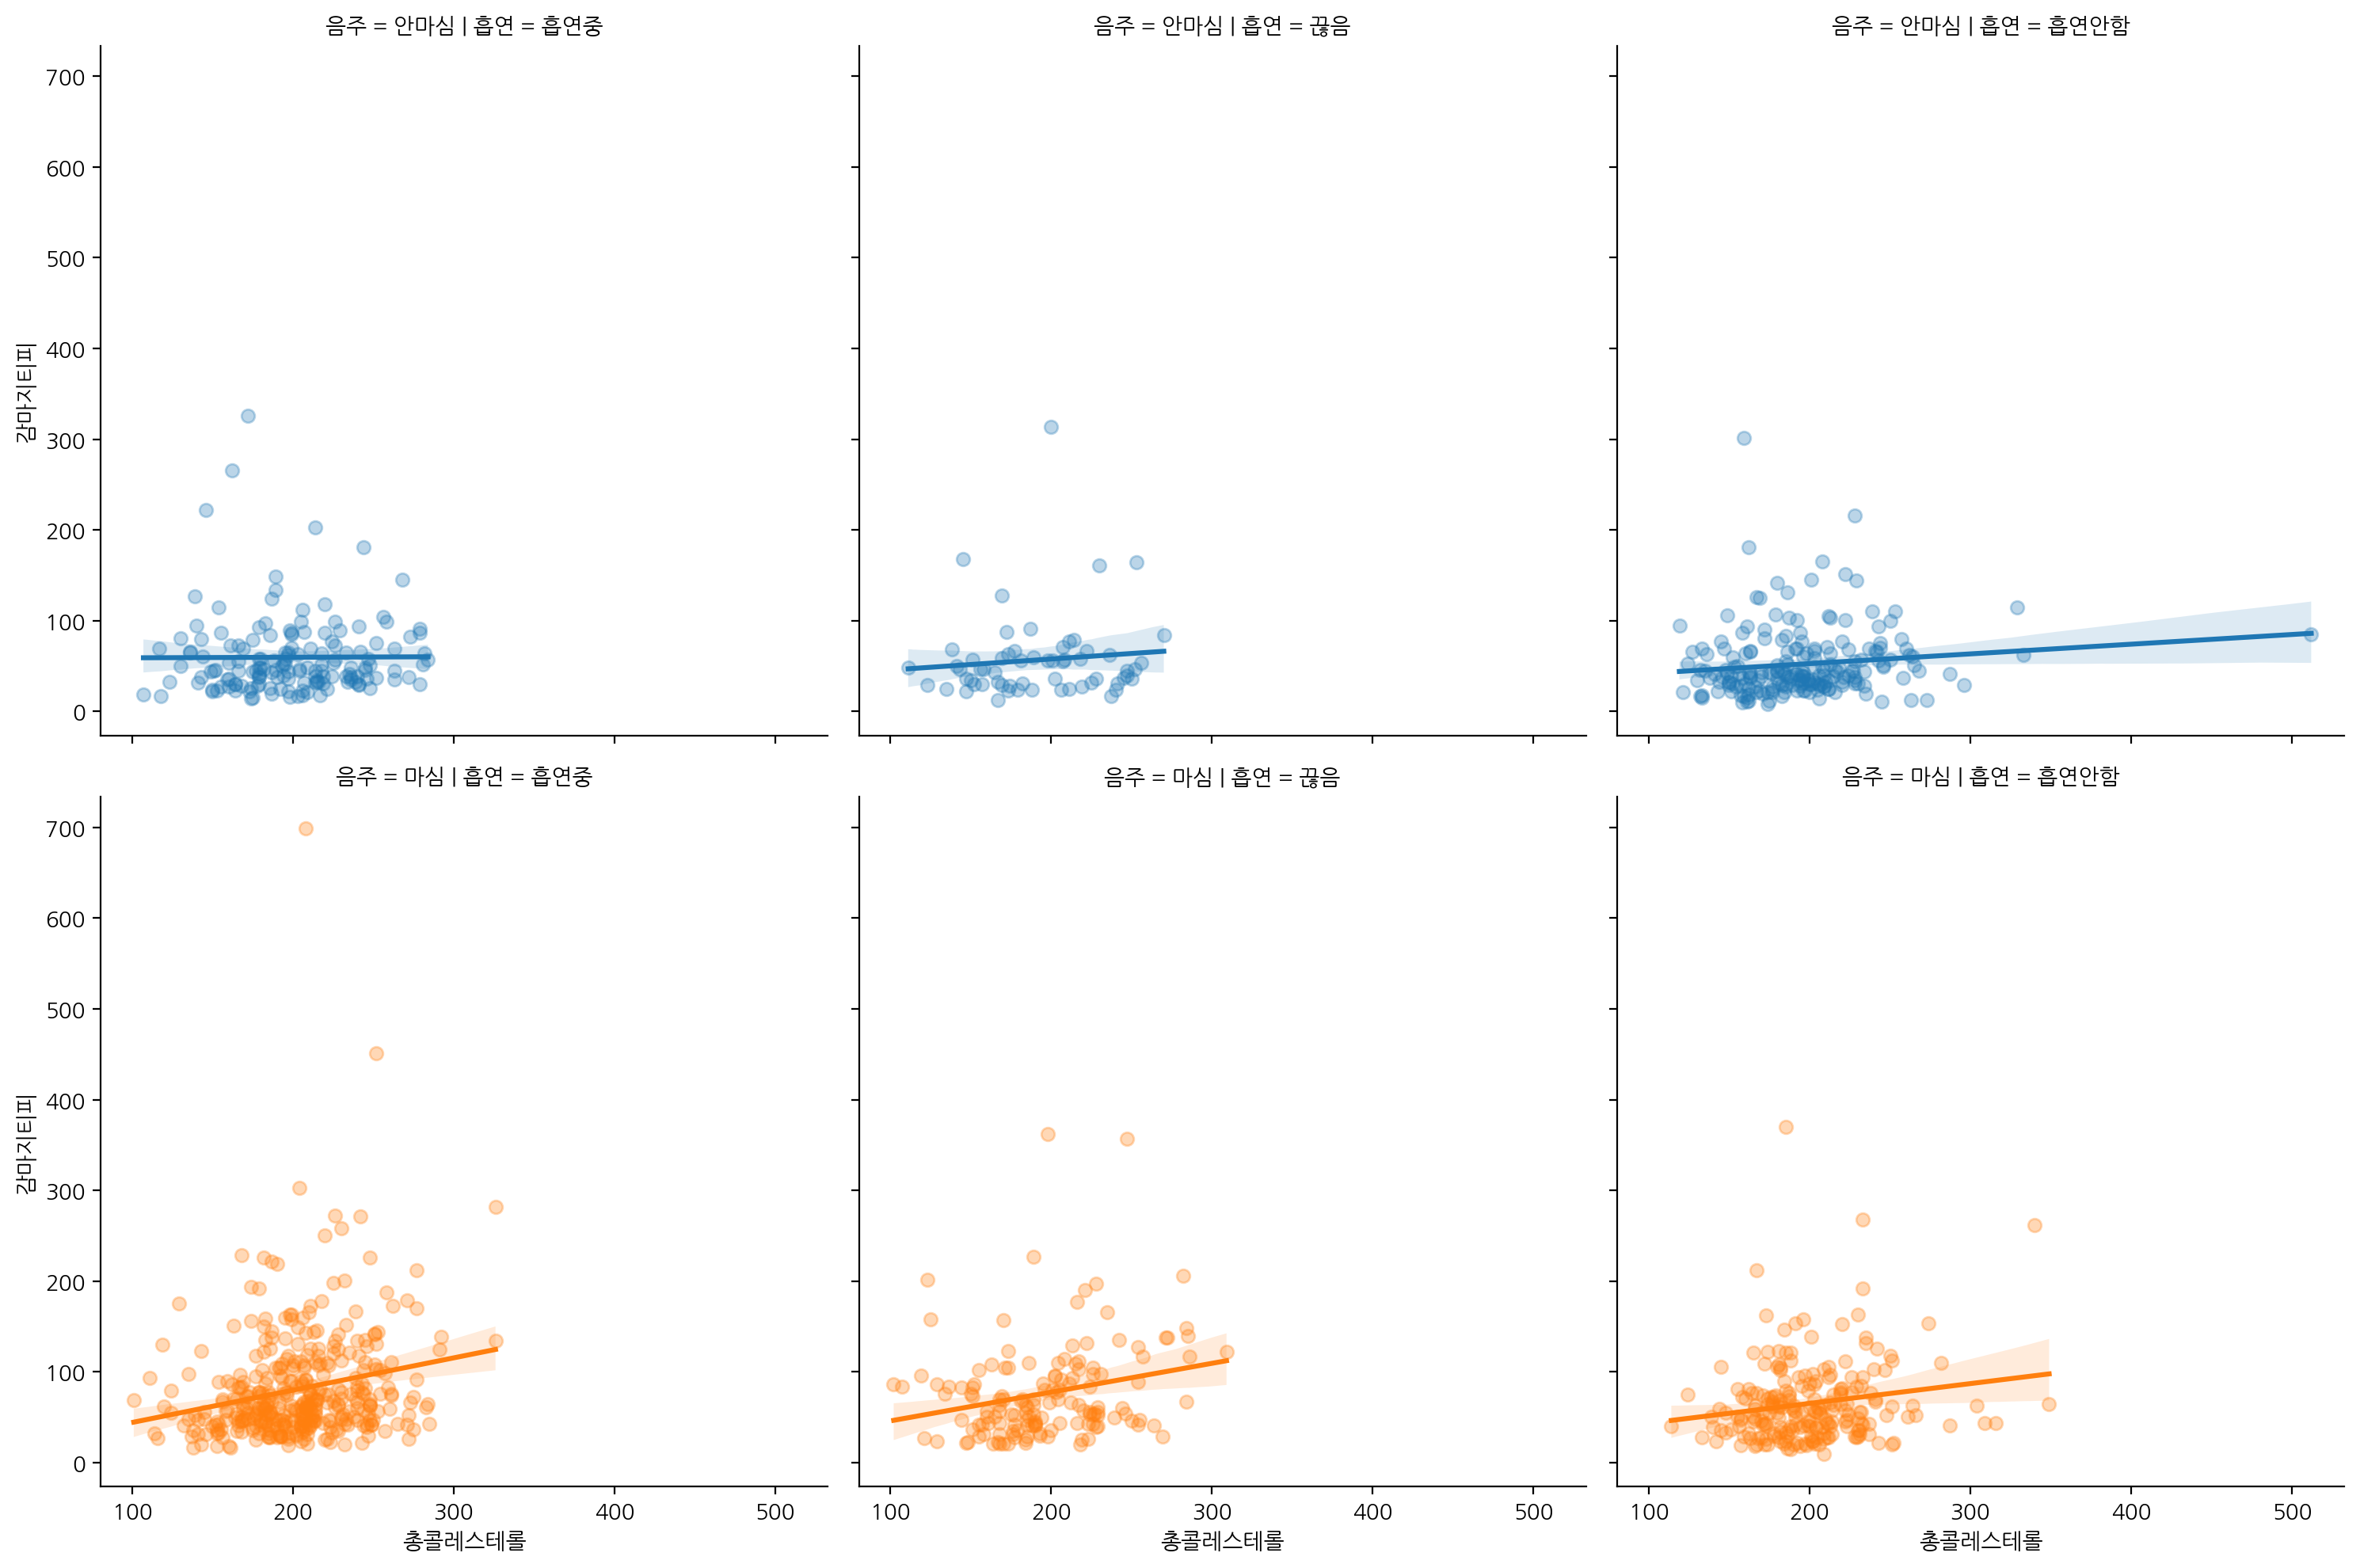

In [ ]:
# 회귀선을 잘 보기 위해, 점의 투명도 조절
p = sns.lmplot(data=df_over120, x="총콜레스테롤", y="감마지티피", col="흡연", row="음주", hue="음주", scatter_kws={'alpha':0.3})

## (+) 축 범위 조정


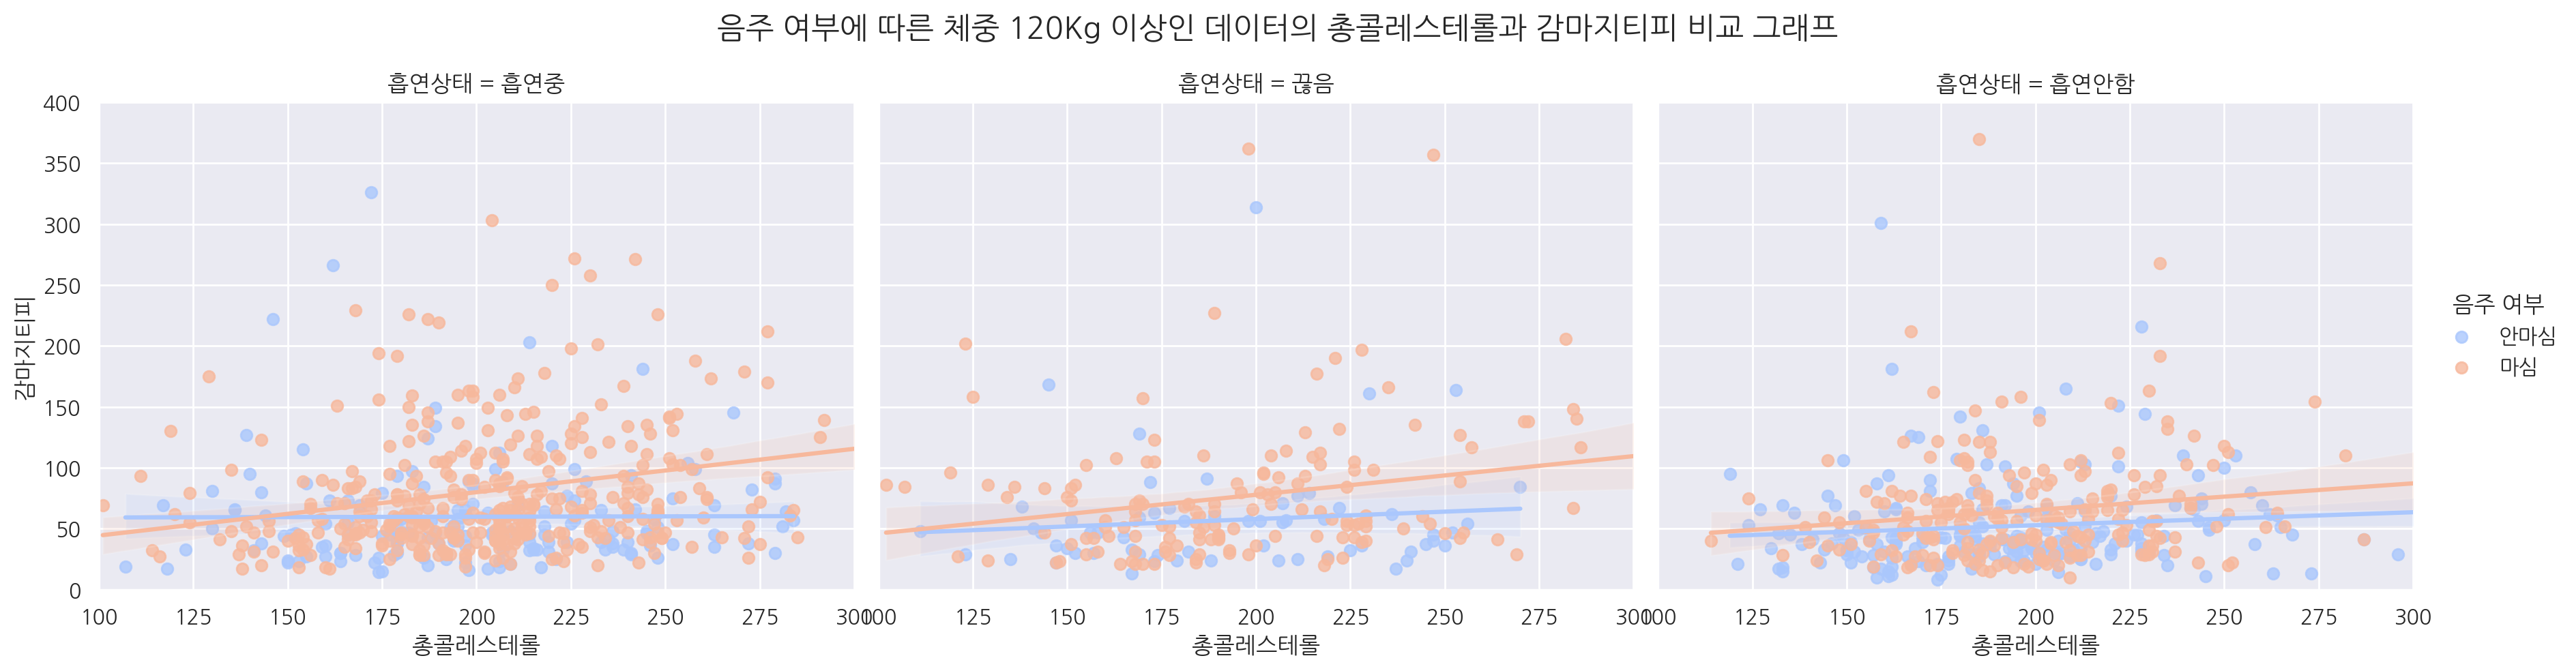

In [ ]:
# FacetGrid 설정
g = sns.FacetGrid(df4_filtered, col='흡연상태', hue='음주여부', palette='coolwarm', height=5, aspect=1.2)

# 회귀선을 포함한 산점도 플로팅
g.map(sns.regplot, '총콜레스테롤', '감마지티피')

# 축 범위 조정
for ax in g.axes.flat:
    ax.set_xlim(100, 300)  # 총콜레스테롤 x축 범위
    ax.set_ylim(0, 400)  # 감마지티피 y축 범위

# 그래프 제목 및 레이블 설정
g.fig.suptitle('음주 여부에 따른 체중 120Kg 이상인 데이터의 총콜레스테롤과 감마지티피 비교 그래프', fontsize=16)
g.set_axis_labels('총콜레스테롤', '감마지티피')
g.add_legend(title='음주 여부')

# 그래프 표시
plt.subplots_adjust(top=0.85)
plt.show()

**[인자 설명]**

**총콜레스테롤**
- 혈청 중의 에스텔형, 비에스테형(유리) 콜레스테롤의 합
- 수치가 높으면 **심뇌혈관질환** 위험성이 증가
- 정상치 : 150~250mg/dL

**감마지티피**
- 간 기능을 나타내는 혈액검사상의 수치, 간 내의 쓸개관(담관)에 존재하는 효소.
- **쓸개즙(담즙) 배설 장애, 간세포 장애 발생 시 혈중에 증가**하게 됨.
- 정상치 : 남성 11 ~ 63 IU/L, 여성 8 ~ 35 IU/L
---

## Analyze
- 음주하지 않는 경우, 회귀선의 기울기가 작기 때문에 감마지티피 값은 콜레스테롤값과 크게 상관관계가 없는 것으로 보인다.
- 음주하는 경우, 감마지티피 값과 콜레스테롤 값이 동시에 커지는 경향을 보인다.
    - 감마지티피 값은 간 기능 장애가 있는 경우 높게 나오는 인자로, 음주하는 경우 간 기능 장애가 있을 가능성이 높음을 예측할 수 있다.
    - 두 값이 동시에 커지는 경향을 보이므로, 간뿐만 아니라 심뇌혈관 질환의 위험성이 함께 증가한다는 사실을 알 수 있다.

- 체중과 총콜레스테롤, 감마지티피 간의 관계: <br>
체중이 120Kg 이상인 경우 총콜레스테롤과 감마지피티의 수치가 상대적으로 높은 경향이 있습니다. 이는 비만이 고콜레스테롤혈증과 관련이 있을 수 있음을 시사합니다. 특히, 음주와 흡연을 함께하는 경우 해당 수치가 현저히 높음을 알 수 있습니다.

- 음주와 흡연 상태의 영향:

  - 음주 여부:
음주를 하는 사람들은 비음주자에 비해 총콜레스테롤과 감마지티피 수치가 높은 경향이 있습니다. 이는 음주가 심혈관 질환 및 간 건강에 부정적인 영향을 미칠 수 있음을 나타냅니다.
  - 흡연 여부:
흡연을 하는 사람들의 경우, 비흡연자들에 비해 총콜레스테롤과 감마지티피 수치가 확연히 높은 경향이 있습니다.







#📌 Q5
연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!

- 시력은 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기합니다.

- 실명인 데이터를 평균에 포함하게 되면 시력에 대한 평균을 제대로 구하기 어렵습니다. 실명 데이터를 제외하고 연령대, 성별에 따른 평균 좌우 시력을 구해주세요!

- 서브플롯으로 시각화하여 표현해 주고 matplotlib 에 대한 사용법은 다음의 영상도 함께 참고해 주세요! (https://www.youtube.com/watch?v=ZTRKojTLE8M)

- 시각화 예시는 참고사항으로 스타일이나 폰트 구성이 달라도 연령대, 성별 좌우평균시력을 시각화 하면 됩니다.

In [ ]:
# 필요한 컬럼만 추출
df5 = df[['연령대코드(5세단위)', '성별코드', '시력(좌)', '시력(우)']]

# 시력 데이터 전처리

# 실명(9.9) 및 0.1 이하 시력 값을 NaN으로 변환
df5['시력(좌)'] = df5['시력(좌)'].replace({9.9: None, 0.0: None})
df5['시력(우)'] = df5['시력(우)'].replace({9.9: None, 0.0: None})

# 0.1 이상 2.5 이하의 시력 값만 필터링
df5 = df5[(df5['시력(좌)'] >= 0.1) & (df5['시력(좌)'] <= 2.5)]
df5 = df5[(df5['시력(우)'] >= 0.1) & (df5['시력(우)'] <= 2.5)]

# 연령대 매핑
age_code = {1: '0~4세', 2: '5~9세', 3: '10~14세', 4: '15~19세', 5: '20~24세',
            6: '25~29세', 7: '30~34세', 8: '35~39세', 9: '40~44세', 10: '45~49세',
            11: '50~54세', 12: '55~59세', 13: '60~64세', 14: '65~69세', 15: '70~74세',
            16: '75~79세', 17: '80~84세', 18: '85세+'}
df5['연령대'] = df5['연령대코드(5세단위)'].replace(age_code)

# 성별 매핑
gender_code = {1: '남', 2: '여'}
df5['성별'] = df5['성별코드'].replace(gender_code)

df5.head()

,연령대코드(5세단위),성별코드,시력(좌),시력(우),연령대,성별
0,13,1,1.0,1.2,60~64세,남
1,8,2,1.2,1.0,35~39세,여
2,8,1,1.0,0.8,35~39세,남
3,12,2,0.9,1.0,55~59세,여
4,8,1,1.5,1.5,35~39세,남


In [ ]:
# 실명 데이터와 0.1 이하 시력 제거
df5_filtered = df5.dropna(subset=['시력(좌)', '시력(우)'])

# 연령대와 성별별로 좌우 시력의 평균 계산
df5_avg_vision = df5_filtered.groupby(['연령대', '성별']).agg({'시력(좌)': 'mean', '시력(우)': 'mean'}).reset_index()

# 데이터 확인
df5_avg_vision.head()

,연령대,성별,시력(좌),시력(우)
0,20~24세,남,1.092213,1.083185
1,20~24세,여,0.989032,0.982924
2,25~29세,남,1.108857,1.103333
3,25~29세,여,1.01627,1.005915
4,30~34세,남,1.116939,1.112457


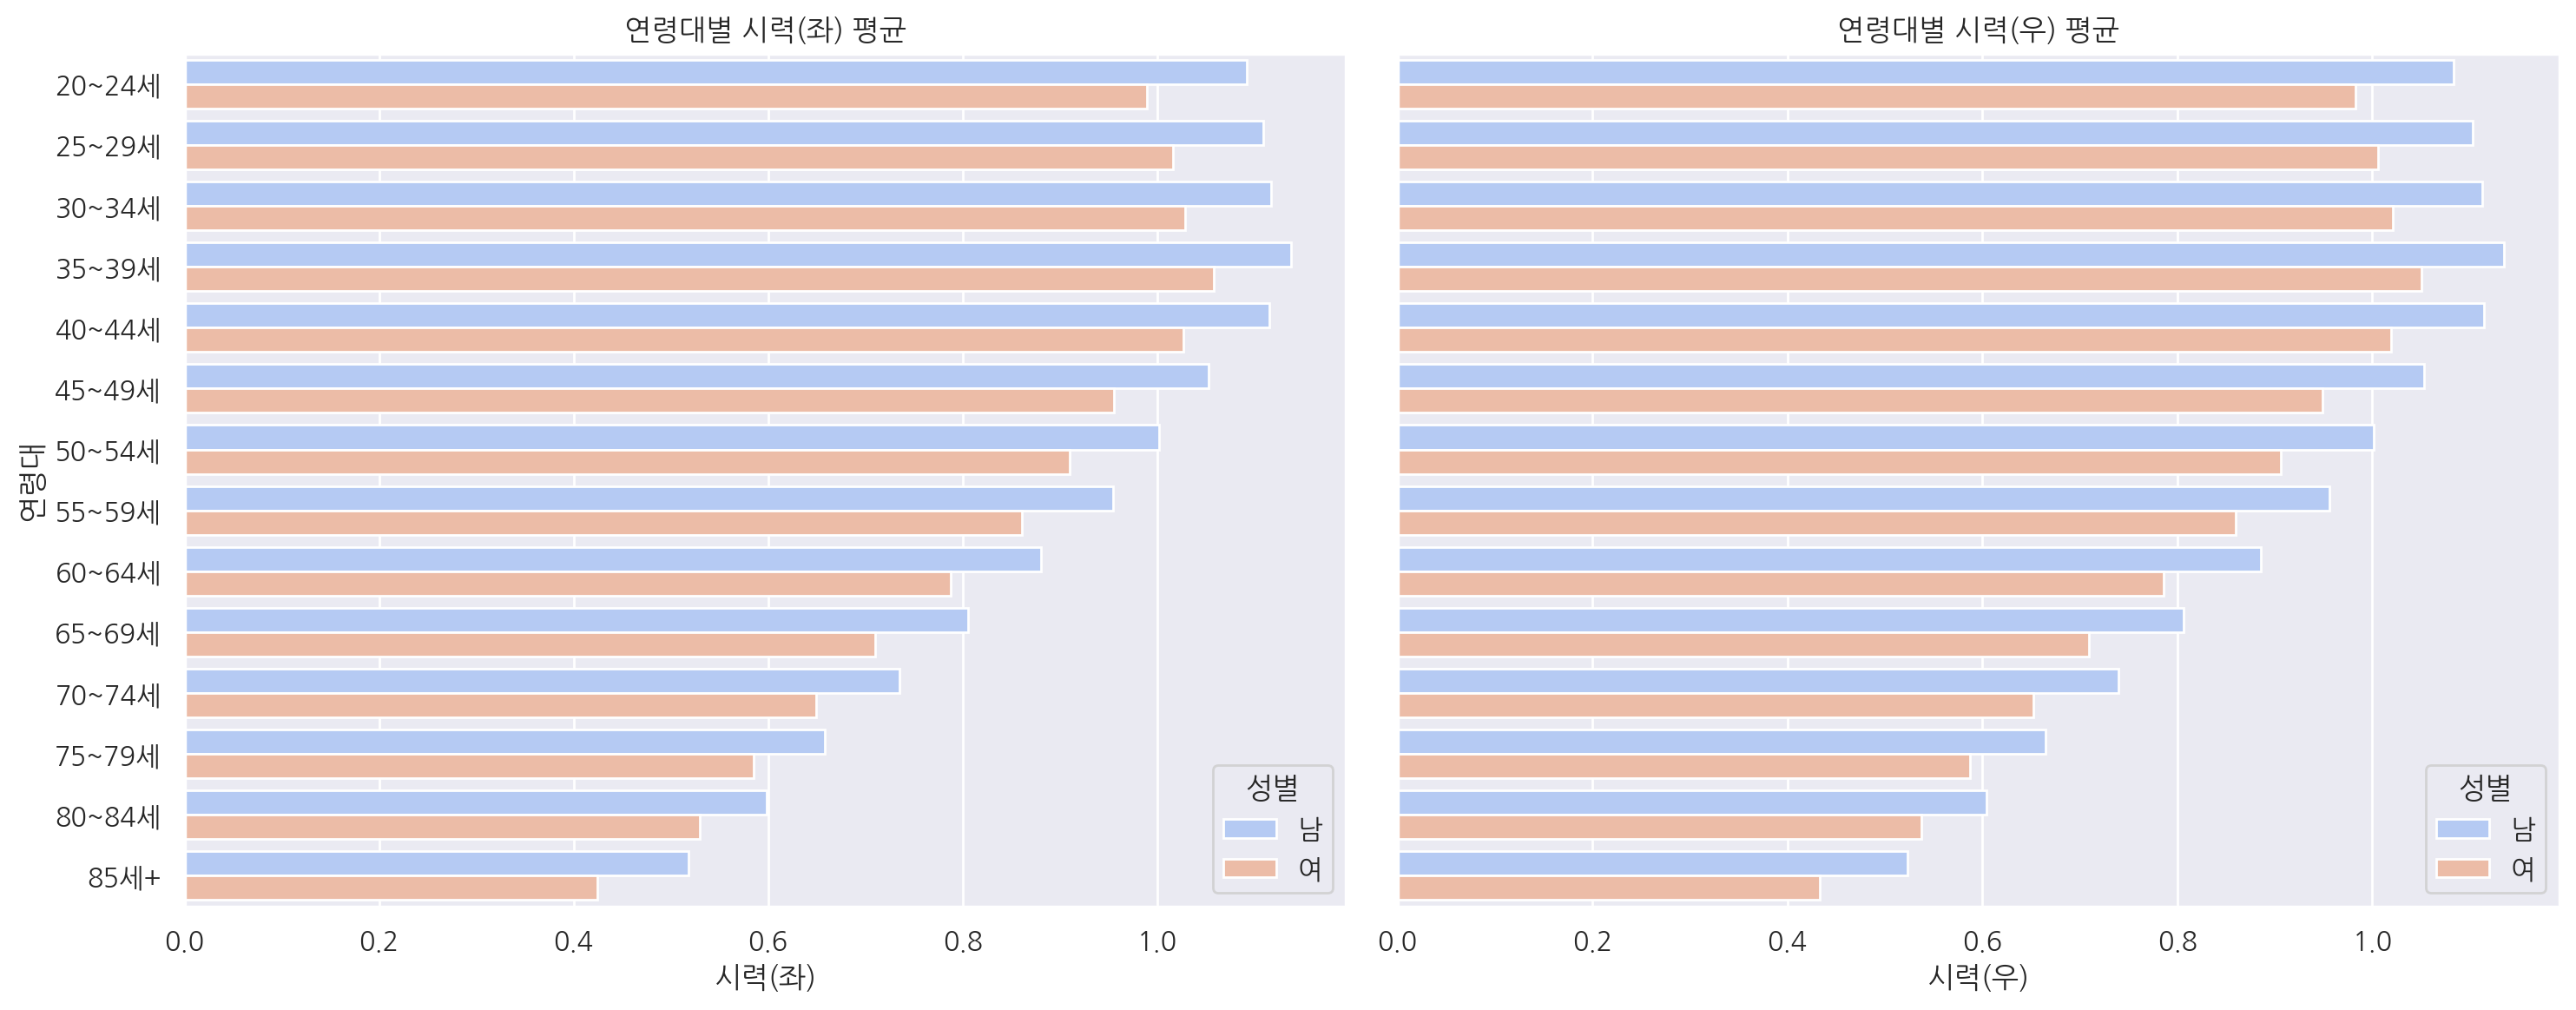

In [ ]:
# 서브플롯 설정
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# 좌안 시력 평균 시각화
sns.barplot(data=df5_avg_vision, y='연령대', x='시력(좌)', hue='성별', ax=axes[0], palette='coolwarm', orient='h')
axes[0].set_title('연령대별 시력(좌) 평균')
axes[0].set_xlabel('시력(좌)')
axes[0].set_ylabel('연령대')
axes[0].legend(title='성별')

# 우안 시력 평균 시각화
sns.barplot(data=df5_avg_vision, y='연령대', x='시력(우)', hue='성별', ax=axes[1], palette='coolwarm', orient='h')
axes[1].set_title('연령대별 시력(우) 평균')
axes[1].set_xlabel('시력(우)')
axes[1].set_ylabel('연령대')
axes[1].legend(title='성별')

# 그래프 표시
plt.tight_layout()
plt.show()

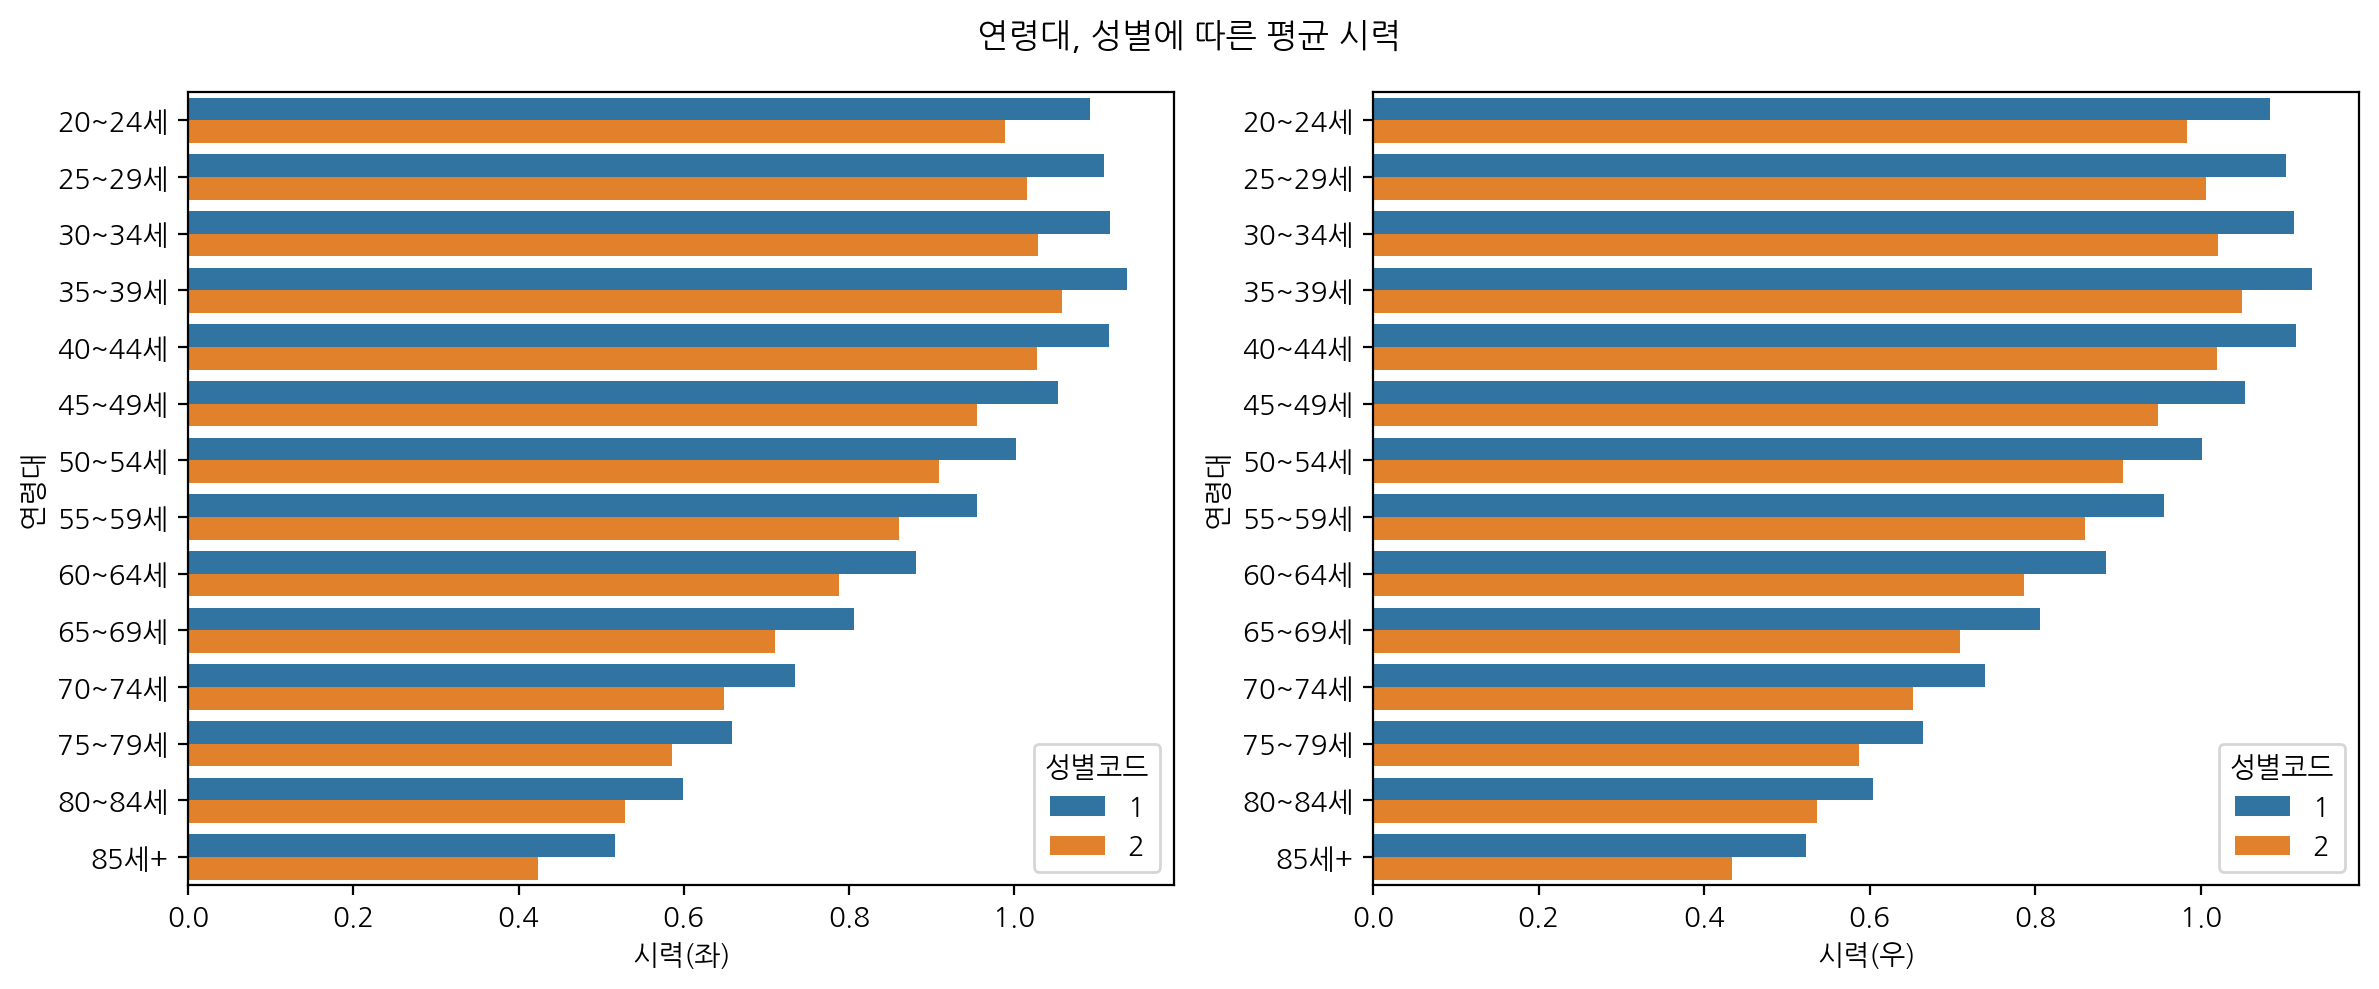

In [ ]:
# 실명값을 제외한 데이터 생성
df_left_notblind = df[df["시력(좌)"] < 9.9].copy()
df_right_notblind = df[df["시력(우)"] < 9.9].copy()

# 시각화 : 서브플롯 설정
fig, ax = plt.subplots(ncols=2, figsize=(12,5))

# 사용할 컬럼 및 데이터를 리스트에 저장
col_list = ["시력(좌)","시력(우)"]
data_list = [df_left_notblind, df_right_notblind]

# 연령대 순서 : y축 정렬에 사용
age_order = sorted(df["연령대"].unique())

# 반복문으로 각 그래프 지정
for i in range(2):
    sns.barplot(data=data_list[i], # 데이터 지정
                x=col_list[i], y="연령대", # x, y축 설정
                hue="성별코드", palette="tab10", # 색상 지정
                errorbar=None, order=age_order, # 에러바 제거, y축 정렬 순서 지정
                ax=ax[i]) # 축 지정

# 제목 설정
fig.suptitle("연령대, 성별에 따른 평균 시력")

# 레이아웃 조정
plt.tight_layout()

# 출력
plt.show()

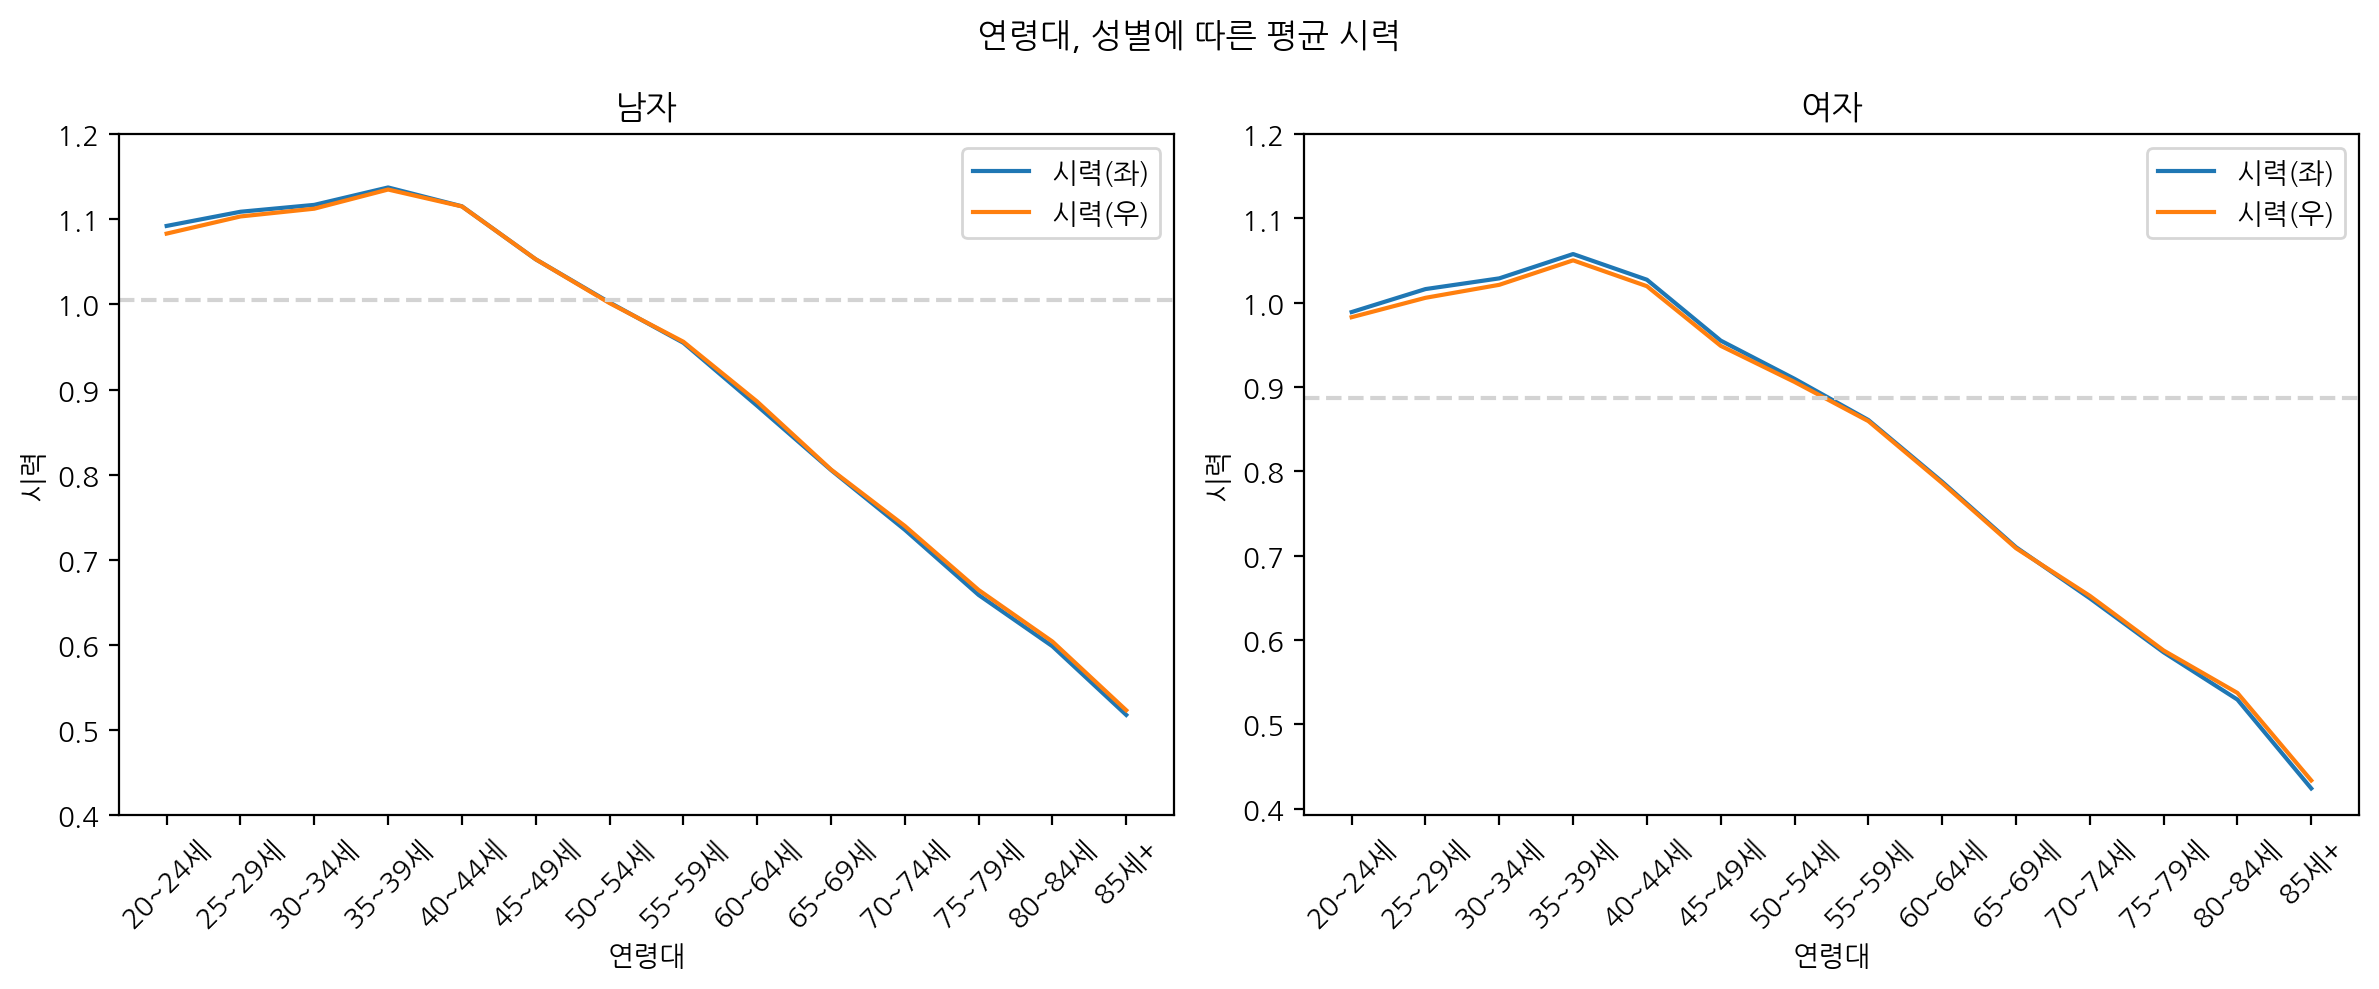

In [ ]:
# 실명값을 제외한 데이터 생성
df_notblind = df[(df["시력(좌)"] < 9.9) & (df["시력(우)"] < 9.9)].copy()

# 시각화 : 서브플롯 설정
fig, ax = plt.subplots(ncols=2, figsize=(12,5))

# 반복문으로 각 그래프 지정
for i in range(2):
    data = df_notblind[df_notblind["성별코드"]==(i+1)].sort_values("연령대")

    # 그래프 설정
    sns.lineplot(data=data, x="연령대", y="시력(좌)", errorbar=None, label="시력(좌)", ax=ax[i])
    sns.lineplot(data=data, x="연령대", y="시력(우)", errorbar=None, label="시력(우)", ax=ax[i])

    # 평균 시력 그래프
    ax[i].axhline(y=data[["시력(좌)","시력(우)"]].mean().mean(), linestyle="--", color="lightgray")

    # x축 설정
    ax[i].tick_params(axis="x", rotation=45)

    # y축 설정
    ax[i].set_yticks(np.arange(0.4,1.3,0.1))
    ax[i].set_ylabel("시력")

    # 제목 설정
    ax[i].set_title(f"{gender[i+1]}")


# 전체 제목 설정
fig.suptitle("연령대, 성별에 따른 평균 시력")

# 출력
plt.tight_layout()
plt.show()

## Analyze
- 평균 시력의 감소 : <br>연령대가 높아질수록 평균 시력이 낮아지는 경향이 있을 수 있습니다. 특히 40대 이후부터 시력 감소가 급격히 나타나며, 이는 노안으로 인한 시력 건강 관리가 필요하다는 점을 시사합니다.
- 성별 차이 : <br>남성과 여성 간 시력의 차이를 한눈에 알 수 있으며, 전반적으로 남성의 시력이 여성보다 높다는 사실을 알 수 있습니다.
- 좌안과 우안의 차이 : <br>좌안과 우안의 시력 차이는 대체로 미미하지만, 연령대가 높아질수록 좌안 시력의 평균이 감소하는 경향이 있습니다. 특히 70대 이상의 연령대에서는 시력 평균이 급격히 낮아질 수 있습니다.

**연령대별**
- 40살 이후부터는 시력이 감소하는 경향을 보이며, 이는 노안 때문으로 추측할 수 있다.
- 20~30대에서는 시력이 증가하는 경향을 보이는데, 이는 2가지 시점으로 해석해 볼 수 있다.
    1. 20대 후반, 30대 초반에 시력교정술을 받는 사람들이 발생해, 연령대가 높아질수록 평균 시력이 증가한다.
    2. 스마트폰 및 전자기기 사용 등의 이유로, 젊은 층에서 시력이 떨어진 사람들의 비율이 높아지고 있다.
        - 2번의 경우, 여러 해의 데이터를 추가로 사용하여 경향성을 파악하는 추가 분석을 진행해 볼 수 있다.